# Estimation of Obesity Levels

## Data Preparation & Visualisation

## Table of Contents
* [Introduction](#intro)
    * [Dataset Source](#ds)
    * [Dataset Details](#dd)
    * [Dataset Features](#df)
    * [Target Feature](#tf)
* [Goals and Objectives](#gao)
* [Data Cleaning and Preprocessing](#dcap)
* [Data Exploration and Visualization](#deav)
* [Literature Review](#lt)
* [Summary and Conclusion](#sc)
* [References](#ref)

## Introduction <a id='intro'></a>

### Dataset Source <a id='ds'></a>

The dataset used in this project, Estimation of Obesity Levels Based On Eating Habits and Physical Condition was obtained from the UCI Machine Learning Repository (Mendoza, F., & Manotas, H., 2019). It contains data for estimating the obesity levels of individuals based on factors such as eating patterns and physical condition, across the countries of Mexico, Peru, and Colombia.

### Dataset Details <a id='dd'></a>

The dataset contains the data required for the estimation of the obesity levels. The estimation is based upon the   eating patterns and physical conditions , across the countries of Mexico, Peru and Colombia with ages ranging from 14 to 61 (Mendoza, F., & Manotas, H., 2019). Variables such as Gender, Age, Height and Weight are present, along with others related to the physical condition (Physical activity frequency (FAF, Time using technology devices (TUE), Consumption of alcohol (CALC) etc.) and eating patterns (Number of main meals (NCP), Consumption of food between meals (CAEC), Frequent consumption of high caloric food (FAVC) etc.) (Mendoza, F., & Manotas, H., 2010). Majority of the variables are given as acronyms, they will be discussed in depth towards the latter section of the report.


The dataset and 2111 observations with 17 of both numerical and categorical attributes inclusive of the target variable. This dataset is recommended for regression, classification modeling.

Before loading the data we load the relevant packages to our jupyter notebook.

In [1]:
#loading the packages

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

# to see all the columns 
pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn-v0_8")
sns.set_theme(style="darkgrid")
##plt.style.use("seaborn")
###

from tabulate import tabulate
from IPython.display import display, HTML


We have retrieved the dataset from a csv named `Phase1_Group24.csv` file present in our local machine. The `read_csv()` function from the pandas package was used to load the dataset. The original dataset name `ObesityDataSet_raw_and_data_sinthetic.csv` was renamed as above.

In [2]:
# the 'ObesityDataSet_raw_and_data_sinthetic.csv' dataset name was loaded
dataset = 'obesity_exploratory.csv'

# loading the data set as df
df = pd.read_csv(dataset)

Displaying ten random observations from the dataset. The seed is set so that each time the same rows will be returned.

In [3]:
# printing 10 random observations (rows) from the dataset

df.sample(10, random_state = 999)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1487,Female,39.126310,1.562889,76.659490,yes,yes,2.000000,3.000000,Sometimes,no,1.440526,no,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I
440,Female,18.000000,1.550000,56.000000,no,yes,2.000000,3.000000,Sometimes,no,1.000000,no,0.000000,0.000000,no,Automobile,Normal_Weight
1060,Female,34.281681,1.673333,77.205685,yes,yes,2.689929,1.835543,Sometimes,no,1.718569,no,0.674348,0.707246,no,Automobile,Overweight_Level_II
875,Female,16.865984,1.644053,67.439589,yes,yes,1.314150,1.068196,Sometimes,no,1.364957,yes,0.000000,0.057926,no,Public_Transportation,Overweight_Level_I
1312,Male,31.641081,1.676595,89.993812,yes,yes,2.934671,2.119682,Sometimes,no,2.041462,no,0.578074,0.000000,Sometimes,Automobile,Obesity_Type_I
1299,Female,21.008051,1.650000,88.126544,yes,yes,2.457547,1.000610,Sometimes,no,3.000000,no,1.361533,1.000000,no,Public_Transportation,Obesity_Type_I
1413,Female,40.466313,1.559005,77.601483,yes,yes,2.000000,3.000000,Sometimes,no,1.572371,no,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I
574,Female,19.833682,1.699464,49.676046,no,yes,1.270448,3.731212,Frequently,no,1.876915,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
1241,Female,40.951591,1.542122,80.000000,yes,yes,2.000000,1.105617,Sometimes,no,1.372811,no,1.629432,0.000000,Sometimes,Automobile,Obesity_Type_I
271,Female,19.000000,1.500000,50.000000,no,yes,2.000000,3.000000,Frequently,no,1.000000,no,0.000000,2.000000,Sometimes,Public_Transportation,Normal_Weight


In [4]:
# getting the shape of the dataset
df.shape

(2111, 17)

### Dataset Features <a id='df'></a>

The below table shows the data type and descriptions of each of the features along with the target variable as stated by (Mendoza, F., & Manotas, H., 2010).

In [5]:
table = [['Variable Name', 'Data Type', 'Units', 'Description'],
         ['Gender', 'nominal categorical', 'NA', 'Male/Female'],
         ['Age', 'numeric', 'NA', 'Age of the individual'],
         ['Height', 'numeric', 'meters', 'Height of the individual'],
         ['Weight', 'numeric','kilograms', 'Weight of the individual'],
         ['family_history_with_overweight', 'binary','NA', 'Family history in obesity\nYes/No'],
         ['FAVC', 'binary','NA', 'The frequency of intake of high caloric food\nYes/No'],
         ['FCVC', 'nominal categorical', 'NA', 'The frequency of the intake of vegetables in\
         \nyour meals\n1 = Never, 2 = Sometimes, 3 = Always'],
         ['NCP', 'nominal categorical', 'NA',  'Number of the main meals per day'],
         ['CAEC', 'ordinal categorical','NA', 'Intake of food between main meals\
         \n1 = No, 2 = Sometimes, 3 = Frequently,\n4 = Always'],
         ['SMOKE', 'binary','NA', 'Yes/No'],
         ['CH2O', 'ordinal categorical','NA', 'Daily water intake\n1 = Less than a liter, 2 = Between 1-2 liters,\
         \n3 = More than 2 liters'],
         ['SCC', 'binary','NA', 'Whether the consumed calories are monitored\nYes/No'],
         ['FAF', 'ordinal categorical','NA', 'Frequency of physical activity\n0 = Do not have, 1 = 1 or 2 days,\
         \n2 = 2 or 4 days, 3 = 4 or 5 days'],
         ['TUE', 'ordinal categorical','NA', 'Time spent using technology devices devices\
         \nsuch as cell phone, videogames, television,\ncomputer etc.\n0 = 0–2 hours, 1 = 3–5 hours,\n2 = more than 5 hours'],
         ['CALC', 'nominal categorical','NA', 'Alcohol intake\n1= No, 2 = Sometimes,\
         \n3 = Frequently, 4 = Always'],
         ['MTRANS', 'nominal categorical','NA', 'Transportation method used\nPublic_Transportation, Walking, Automobile,\
          \nMotorbike, Bike'],
         ['NObeyesdad', 'ordinal categorical', 'NA', 'Obesity level\nInsufficient_Weight, Normal_Weight,\
         \nOverweight_Level_I, Overweight_Level_II, \nObesity_Type_I, Obesity_Type_II, \nObesity_Type_III']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════════════════════╤═════════════════════╤═══════════╤═════════════════════════════════════════════════════════╕
│ Variable Name                  │ Data Type           │ Units     │ Description                                             │
╞════════════════════════════════╪═════════════════════╪═══════════╪═════════════════════════════════════════════════════════╡
│ Gender                         │ nominal categorical │ NA        │ Male/Female                                             │
├────────────────────────────────┼─────────────────────┼───────────┼─────────────────────────────────────────────────────────┤
│ Age                            │ numeric             │ NA        │ Age of the individual                                   │
├────────────────────────────────┼─────────────────────┼───────────┼─────────────────────────────────────────────────────────┤
│ Height                         │ numeric             │ meters    │ Height of the individual                  

### Target Feature <a id='tf'></a>

The target feature used from this dataset will be 'NObeyesdad,' which represents the obesity level. These levels include categories such as Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III. Our objective is to predict or estimate these obesity levels using the features available in the dataset

## Goals and Objectives<a id='gao'></a>

Obesity poses significant health risks, often leading to serious health issues and diseases. The surge in obesity cases is attributed to unhealthy eating habits and unhealthy  lifestyles, compounded by genetic predispositions. Understanding these factors is crucial for tackling this epidemic of obesity.

This project aims to achieve these primary goals. Firstly, through exploratory and statistical analysis of data, it seeks to uncover patterns and insights regarding the relationships between different attributes. This exploration will help us to analyze some factors influencing obesity, going beyond just diet and exercise. Secondly, the project aims to develop a predictive model capable of estimating obesity levels based on physical activity and eating habits. By categorizing age demographics, it aims to highlight the increasing trends in obesity among different ages, aiding in targeted interventions and policies. Lastly, the project endeavors to identify attributes with significant relative importance in predicting obesity levels, beyond the conventional metrics like height and weight. 

This understanding will provide insights into the multifaceted nature of obesity, guiding efforts towards effective prevention and management strategies.

## Data Cleaning and Preprocessing<a id='dcap'></a>

This section of the report focuses on the procedures of data cleaning and preprocessing of the project. We have followed the following steps to achieve this objective.
- Renaming the columns
- Changing the column data types
- Checking for inconsistencies
- Checking for outliers
- Check the missing values
- Dropping duplicates

In [6]:
# printing the names of the columns
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

#### Renaming the columns

The columns do not contain any ID like columns and any consistent features at a glance. Almost all the columns seems relevant for the tasks at hand in the first phase of the project. Therefore none of the columns will be dropped in this phase.

Although, for most of the columns are given acronyms. For these will give try to give meaningful and short names for the columns for ease in identification. 

If needs to be renamed age, gender, height, weight, obesity of parents, smoking habits, consumption of
vegetables, water intake, physical activity, consumption of alcohol


In [7]:
# creating the dict to rename columns
rename_columns = {
    'family_history_with_overweight': 'family_history',
    'FAVC': 'high_calorie_intake',
    'FCVC': 'veg_intake',
    'NCP': 'main_meals',
    'CAEC': 'food_between_meals',
    'SMOKE': 'smoking_habits',
    'CH2O': 'water_intake',
    'SCC': 'calorie_monitoring',
    'FAF': 'physical_activity',
    'TUE': 'tech_usage_time',
    'CALC': 'alcohol_intake',
    'MTRANS': 'transport_method',
    'NObeyesdad': 'obesity_level'}

# renaming the columns
df = df.rename(columns = rename_columns)

# converting all the column names to lower case
df.columns = df.columns.str.lower().str.strip() 

# checking whether the column names are changed
df.columns.to_list()

['gender',
 'age',
 'height',
 'weight',
 'family_history',
 'high_calorie_intake',
 'veg_intake',
 'main_meals',
 'food_between_meals',
 'smoking_habits',
 'water_intake',
 'calorie_monitoring',
 'physical_activity',
 'tech_usage_time',
 'alcohol_intake',
 'transport_method',
 'obesity_level']

In [8]:
# sample dataset
df.sample(5, random_state=99)

,gender,age,height,weight,family_history,high_calorie_intake,veg_intake,main_meals,food_between_meals,smoking_habits,water_intake,calorie_monitoring,physical_activity,tech_usage_time,alcohol_intake,transport_method,obesity_level
1721,Male,40.564513,1.748015,109.758736,yes,yes,2.310751,3.220181,Sometimes,no,1.006643,no,1.158040,0.000000,no,Automobile,Obesity_Type_II
333,Female,23.000000,1.700000,56.000000,no,no,3.000000,4.000000,Always,no,3.000000,yes,3.000000,0.000000,no,Automobile,Normal_Weight
2029,Female,20.438478,1.805803,153.149491,yes,yes,3.000000,3.000000,Sometimes,no,2.387991,no,0.850715,0.656491,Sometimes,Public_Transportation,Obesity_Type_III
1318,Male,23.237302,1.761008,97.829344,yes,yes,2.000000,3.000000,Sometimes,no,2.988771,no,2.429923,1.978043,no,Public_Transportation,Obesity_Type_I
1288,Female,22.836315,1.604893,82.000000,yes,yes,1.008760,1.000000,Sometimes,no,2.000000,no,0.000000,0.585912,Sometimes,Public_Transportation,Obesity_Type_I


The column names are meaningful and structured now. Lets check whether the data types of the columns are correct.

#### Changing the column data types

In [9]:
# displaying the information of the data
display(HTML('<b>Table 1: Column Info and Data types</b>'))
print(df.dtypes)

gender                  object
age                    float64
height                 float64
weight                 float64
family_history          object
high_calorie_intake     object
veg_intake             float64
main_meals             float64
food_between_meals      object
smoking_habits          object
water_intake           float64
calorie_monitoring      object
physical_activity      float64
tech_usage_time        float64
alcohol_intake          object
transport_method        object
obesity_level           object
dtype: object


The data types are not in the intended data types. Lets convert them to the correct type. The columns `veg_intake, water_intake, physical_activity, tech_usage_time` and `main_meals` need to be converted to a object data type.

Apart from that the columns that should be in integer are present in float data type. These columns contain continuous data whereas they should be having discrete data. `age`should be having discrete data. We have to convert them to the proper type and round them to the nearest integer as well.

In [10]:
# converting the data types.
convert_to_object = ['veg_intake', 'water_intake', 'physical_activity', 'tech_usage_time', 'main_meals']

for col in convert_to_object:
    df[col] = df[col].apply(round).astype(object)
    
# converting the age column to int data type
df['age'] = df['age'].apply(round).astype(int) 

In [11]:
df.dtypes

gender                  object
age                      int64
height                 float64
weight                 float64
family_history          object
high_calorie_intake     object
veg_intake              object
main_meals              object
food_between_meals      object
smoking_habits          object
water_intake            object
calorie_monitoring      object
physical_activity       object
tech_usage_time         object
alcohol_intake          object
transport_method        object
obesity_level           object
dtype: object

Now all the columns are in the correct data type. Next we can check for inconsistencies in the data of the categorical variables. Lets check for categorical features first.

#### Checking for inconsistencies

In [12]:
display(HTML('<b>Table 2: Categorical Features Summary</b>'))
df.describe(include='object').T

,count,unique,top,freq
gender,2111,2,Male,1068
family_history,2111,2,yes,1726
high_calorie_intake,2111,2,yes,1866
veg_intake,2111,3,2,1013
main_meals,2111,4,3,1470
food_between_meals,2111,4,Sometimes,1765
smoking_habits,2111,2,no,2067
water_intake,2111,3,2,1110
calorie_monitoring,2111,2,no,2015
physical_activity,2111,4,1,776


In [13]:
# getting list for categorical data types
categorical_features = df.columns[df.dtypes==object].tolist()


# converting the strings all to lower case except the target variable
for col in ['gender', 'family_history', 'high_calorie_intake', 'smoking_habits', 'food_between_meals', 'alcohol_intake', 'transport_method']:
    df[col] = df[col].str.lower()

# loop to get all the 
for col in categorical_features:
    print('Unique value of ' + col)
    print(df[col].unique())
    print('')

Unique value of gender
['female' 'male']

Unique value of family_history
['yes' 'no']

Unique value of high_calorie_intake
['no' 'yes']

Unique value of veg_intake
[2 3 1]

Unique value of main_meals
[3 1 4 2]

Unique value of food_between_meals
['sometimes' 'frequently' 'always' 'no']

Unique value of smoking_habits
['no' 'yes']

Unique value of water_intake
[2 3 1]

Unique value of calorie_monitoring
['no' 'yes']

Unique value of physical_activity
[0 3 2 1]

Unique value of tech_usage_time
[1 0 2]

Unique value of alcohol_intake
['no' 'sometimes' 'frequently' 'always']

Unique value of transport_method
['public_transportation' 'walking' 'automobile' 'motorbike' 'bike']

Unique value of obesity_level
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']



We converted the strings except the target variable to lower case for consistency within the data. There seems to be no white spaces and the data looks clean. There is no need for further data cleaning for categorical variables.

Next lets generate the summary statistics for the numerical features to check for outliers and domain errors.

In [14]:
display(HTML('<b>Table 3: Numerical Features Summary</b>'))
df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
age,2111.0,24.315964,6.357078,14.00,20.000000,23.000000,26.000000,61.00
height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00


The summary statistics show that the data is within the domains of the dataset description. This is that the `age, height, weight` are positive.

The `age` and `weight` seems to have outliers present. Lets check further for outliers within these numerical features along with 'height'

#### Checking for outliers

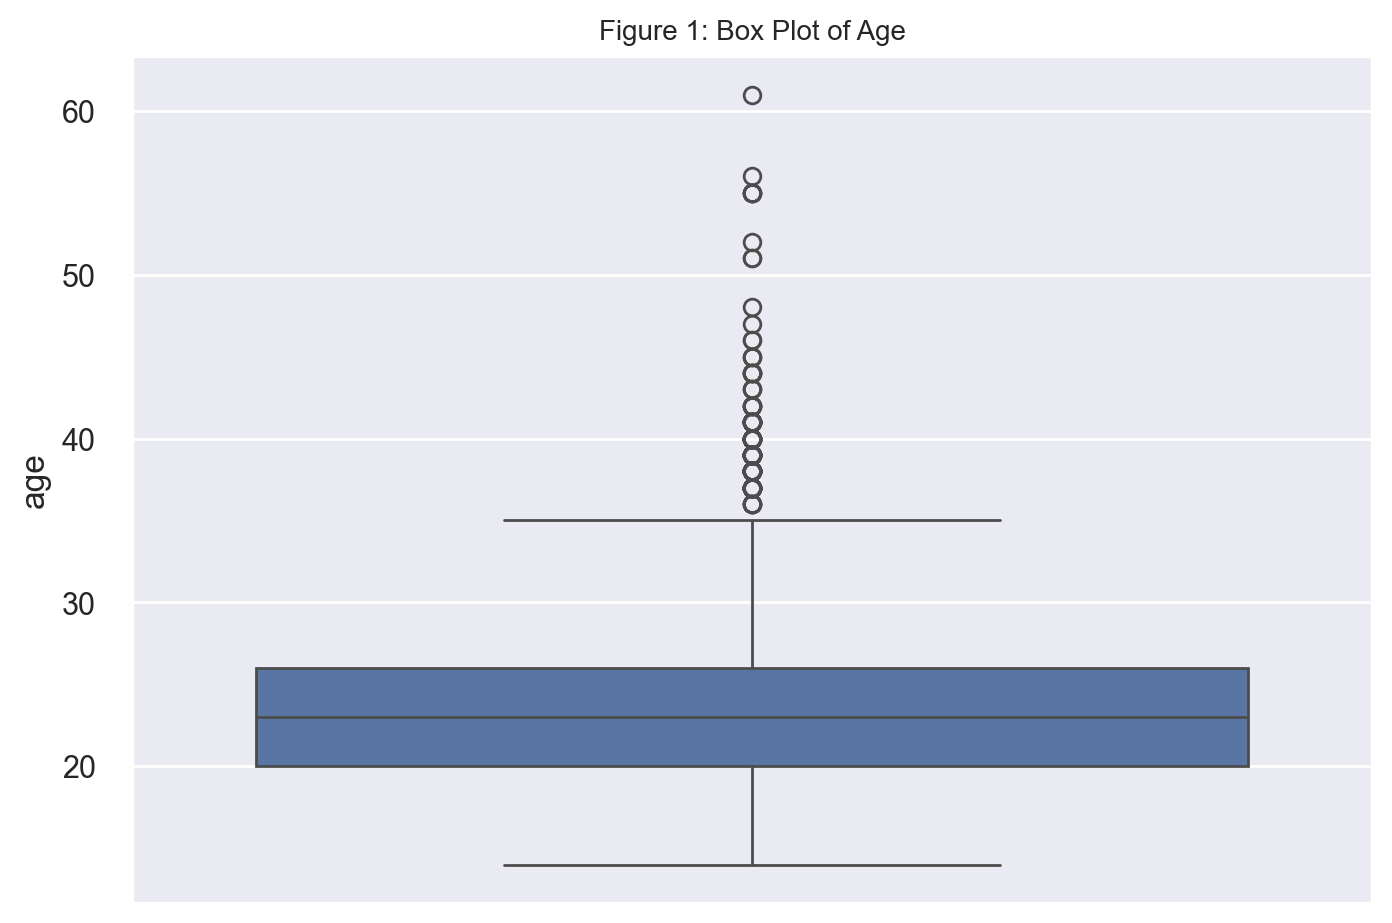

In [15]:
# boxplot of age
sns.boxplot(df['age']).set_title('Figure 1: Box Plot of Age', fontsize = 10)
plt.show()

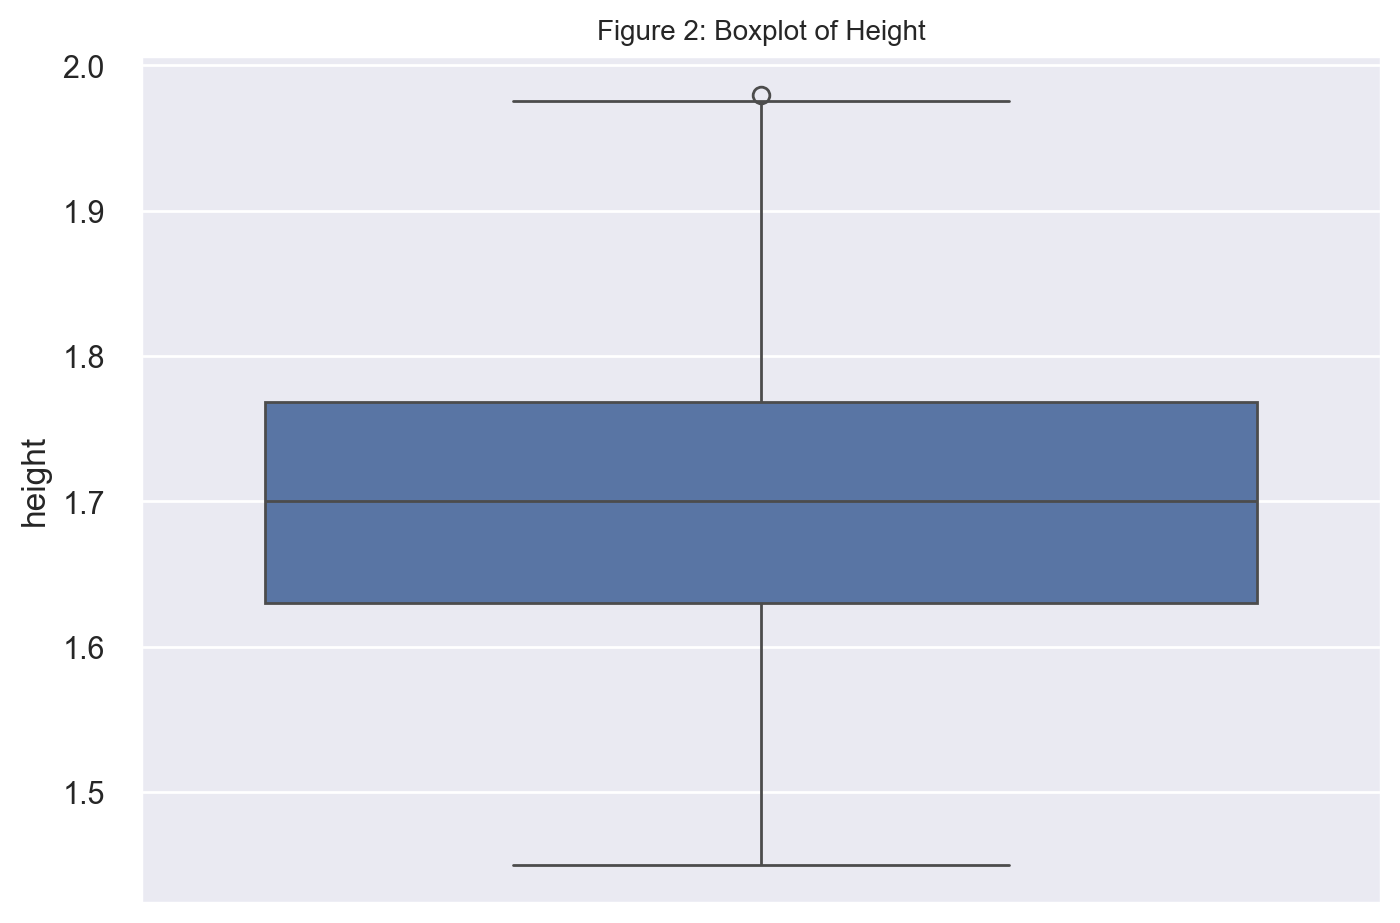

In [16]:
# boxplot of height
sns.boxplot(df['height']).set_title('Figure 2: Boxplot of Height', fontsize = 10)
plt.show()

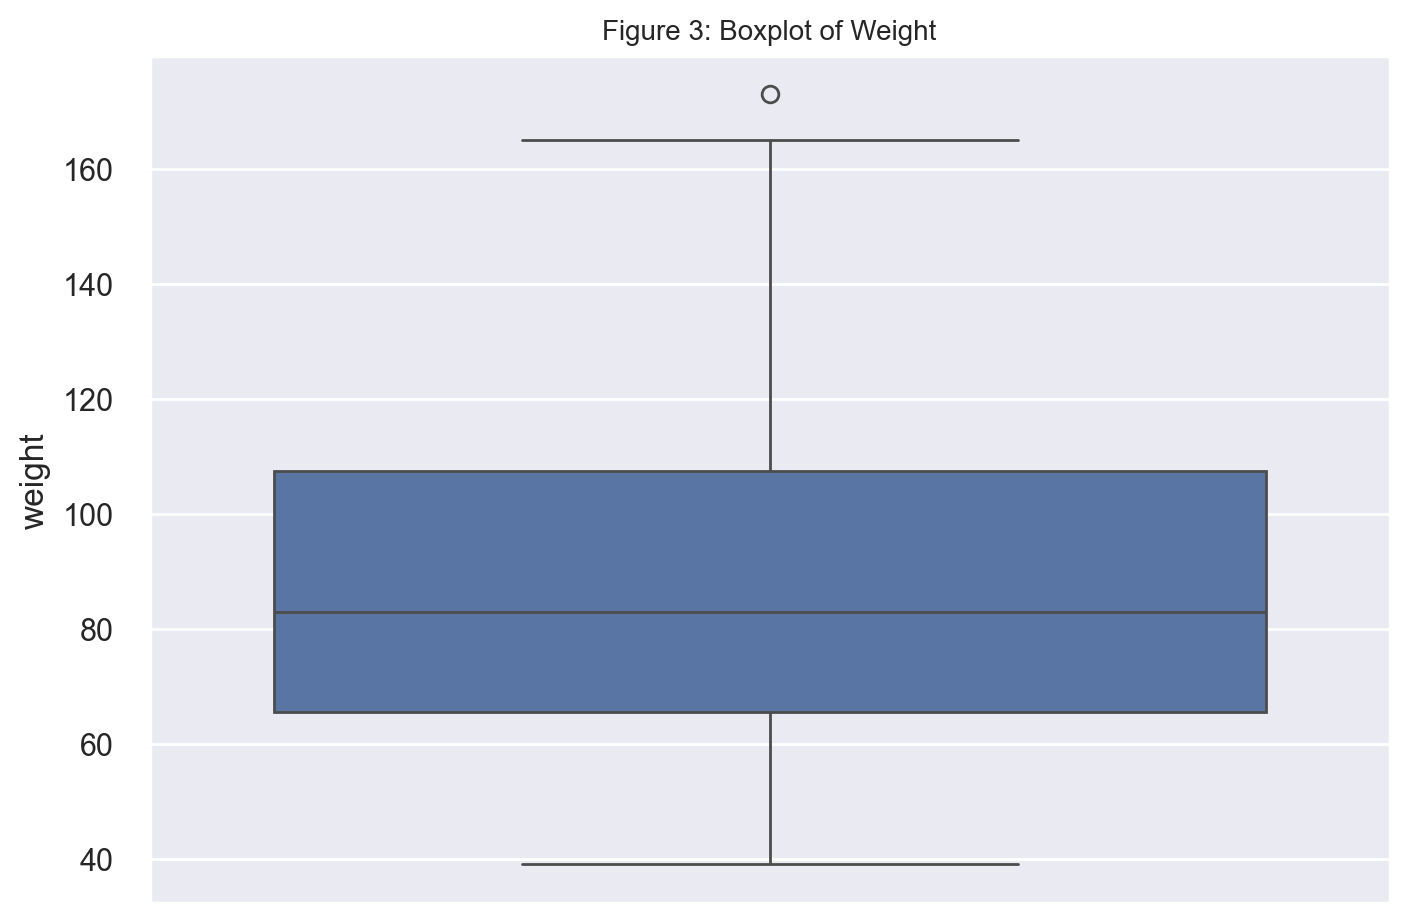

In [17]:
# boxplot of weight
sns.boxplot(df['weight']).set_title('Figure 3: Boxplot of Weight', fontsize = 10)
plt.show()

From the box plots of we can observe that the `age` contains a considerable number of outliers. Lets filter the outliers using the interquartile range.

In [18]:
# getting the outliers
def outliers(col):
    
    #getting the quartiles
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # getting the interquartile range
    IQR = Q3 - Q1
    
    # fitering the outliers from the dataset
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    
    return outliers

In [19]:
# getting the outliers for age
outliers_age = outliers('age')
outliers_age.age

13      41
21      52
33      39
92      55
104     38
        ..
1740    38
1775    37
1776    38
1777    39
1778    38
Name: age, Length: 160, dtype: int64

The `age` contains 160 outliers and `weight` contains only one outlier. We will drop the outliers from the dataset as it can affect the modeling phase of our project.

In [20]:
# getting the outliers index
df.drop(outliers_age.index, inplace=True)

The outliers are successfully dropped from the dataset. Next we will check for the missing values in the dataset

#### Checking Missing Values

Lets check the dataset for missing values.

In [21]:
print('Sum of missing values in each feature\n')
print(df.isnull().sum())

Sum of missing values in each feature

gender                 0
age                    0
height                 0
weight                 0
family_history         0
high_calorie_intake    0
veg_intake             0
main_meals             0
food_between_meals     0
smoking_habits         0
water_intake           0
calorie_monitoring     0
physical_activity      0
tech_usage_time        0
alcohol_intake         0
transport_method       0
obesity_level          0
dtype: int64


We checked the missing values by checking the missing values per feature and as seen above there are no missing values. Lets check the dataset for duplicates and drop them from the dataset.

#### Dropping duplicates

In [22]:
# getting the count of duplicates
df.duplicated(keep = 'first').sum()

27

In [23]:
# dropping the duplicates
df.drop_duplicates(inplace = True)

In [24]:
# shape and the sample of the dataset after cleaning
print(f'The shape of the dataset {df.shape}')
df.sample(5, random_state=100)

The shape of the dataset (1924, 17)


,gender,age,height,weight,family_history,high_calorie_intake,veg_intake,main_meals,food_between_meals,smoking_habits,water_intake,calorie_monitoring,physical_activity,tech_usage_time,alcohol_intake,transport_method,obesity_level
2069,female,24,1.650726,113.774198,yes,yes,3,3,sometimes,no,3,no,0,1,sometimes,public_transportation,Obesity_Type_III
1077,female,24,1.663509,80.000000,yes,yes,2,3,sometimes,no,2,no,0,0,no,public_transportation,Overweight_Level_II
1885,female,26,1.640125,111.539494,yes,yes,3,3,sometimes,no,3,no,0,0,sometimes,public_transportation,Obesity_Type_III
438,female,19,1.670000,64.000000,no,yes,3,3,sometimes,no,2,no,2,1,sometimes,automobile,Normal_Weight
1991,female,22,1.729099,134.842656,yes,yes,3,3,sometimes,no,1,no,2,1,sometimes,public_transportation,Obesity_Type_III


That concludes the data cleaning and preprocessing section. Lets move onto the data exploration and visualization.

In [25]:
#df.to_csv('phase2_group24.csv')

## Data Exploration and Visualization<a id='deav'></a>

Lets us start exploring and visualizing the data. First lets focus on the univariate visualizations.

### Univariate Visualisation

#### Bar Chart of Obesity

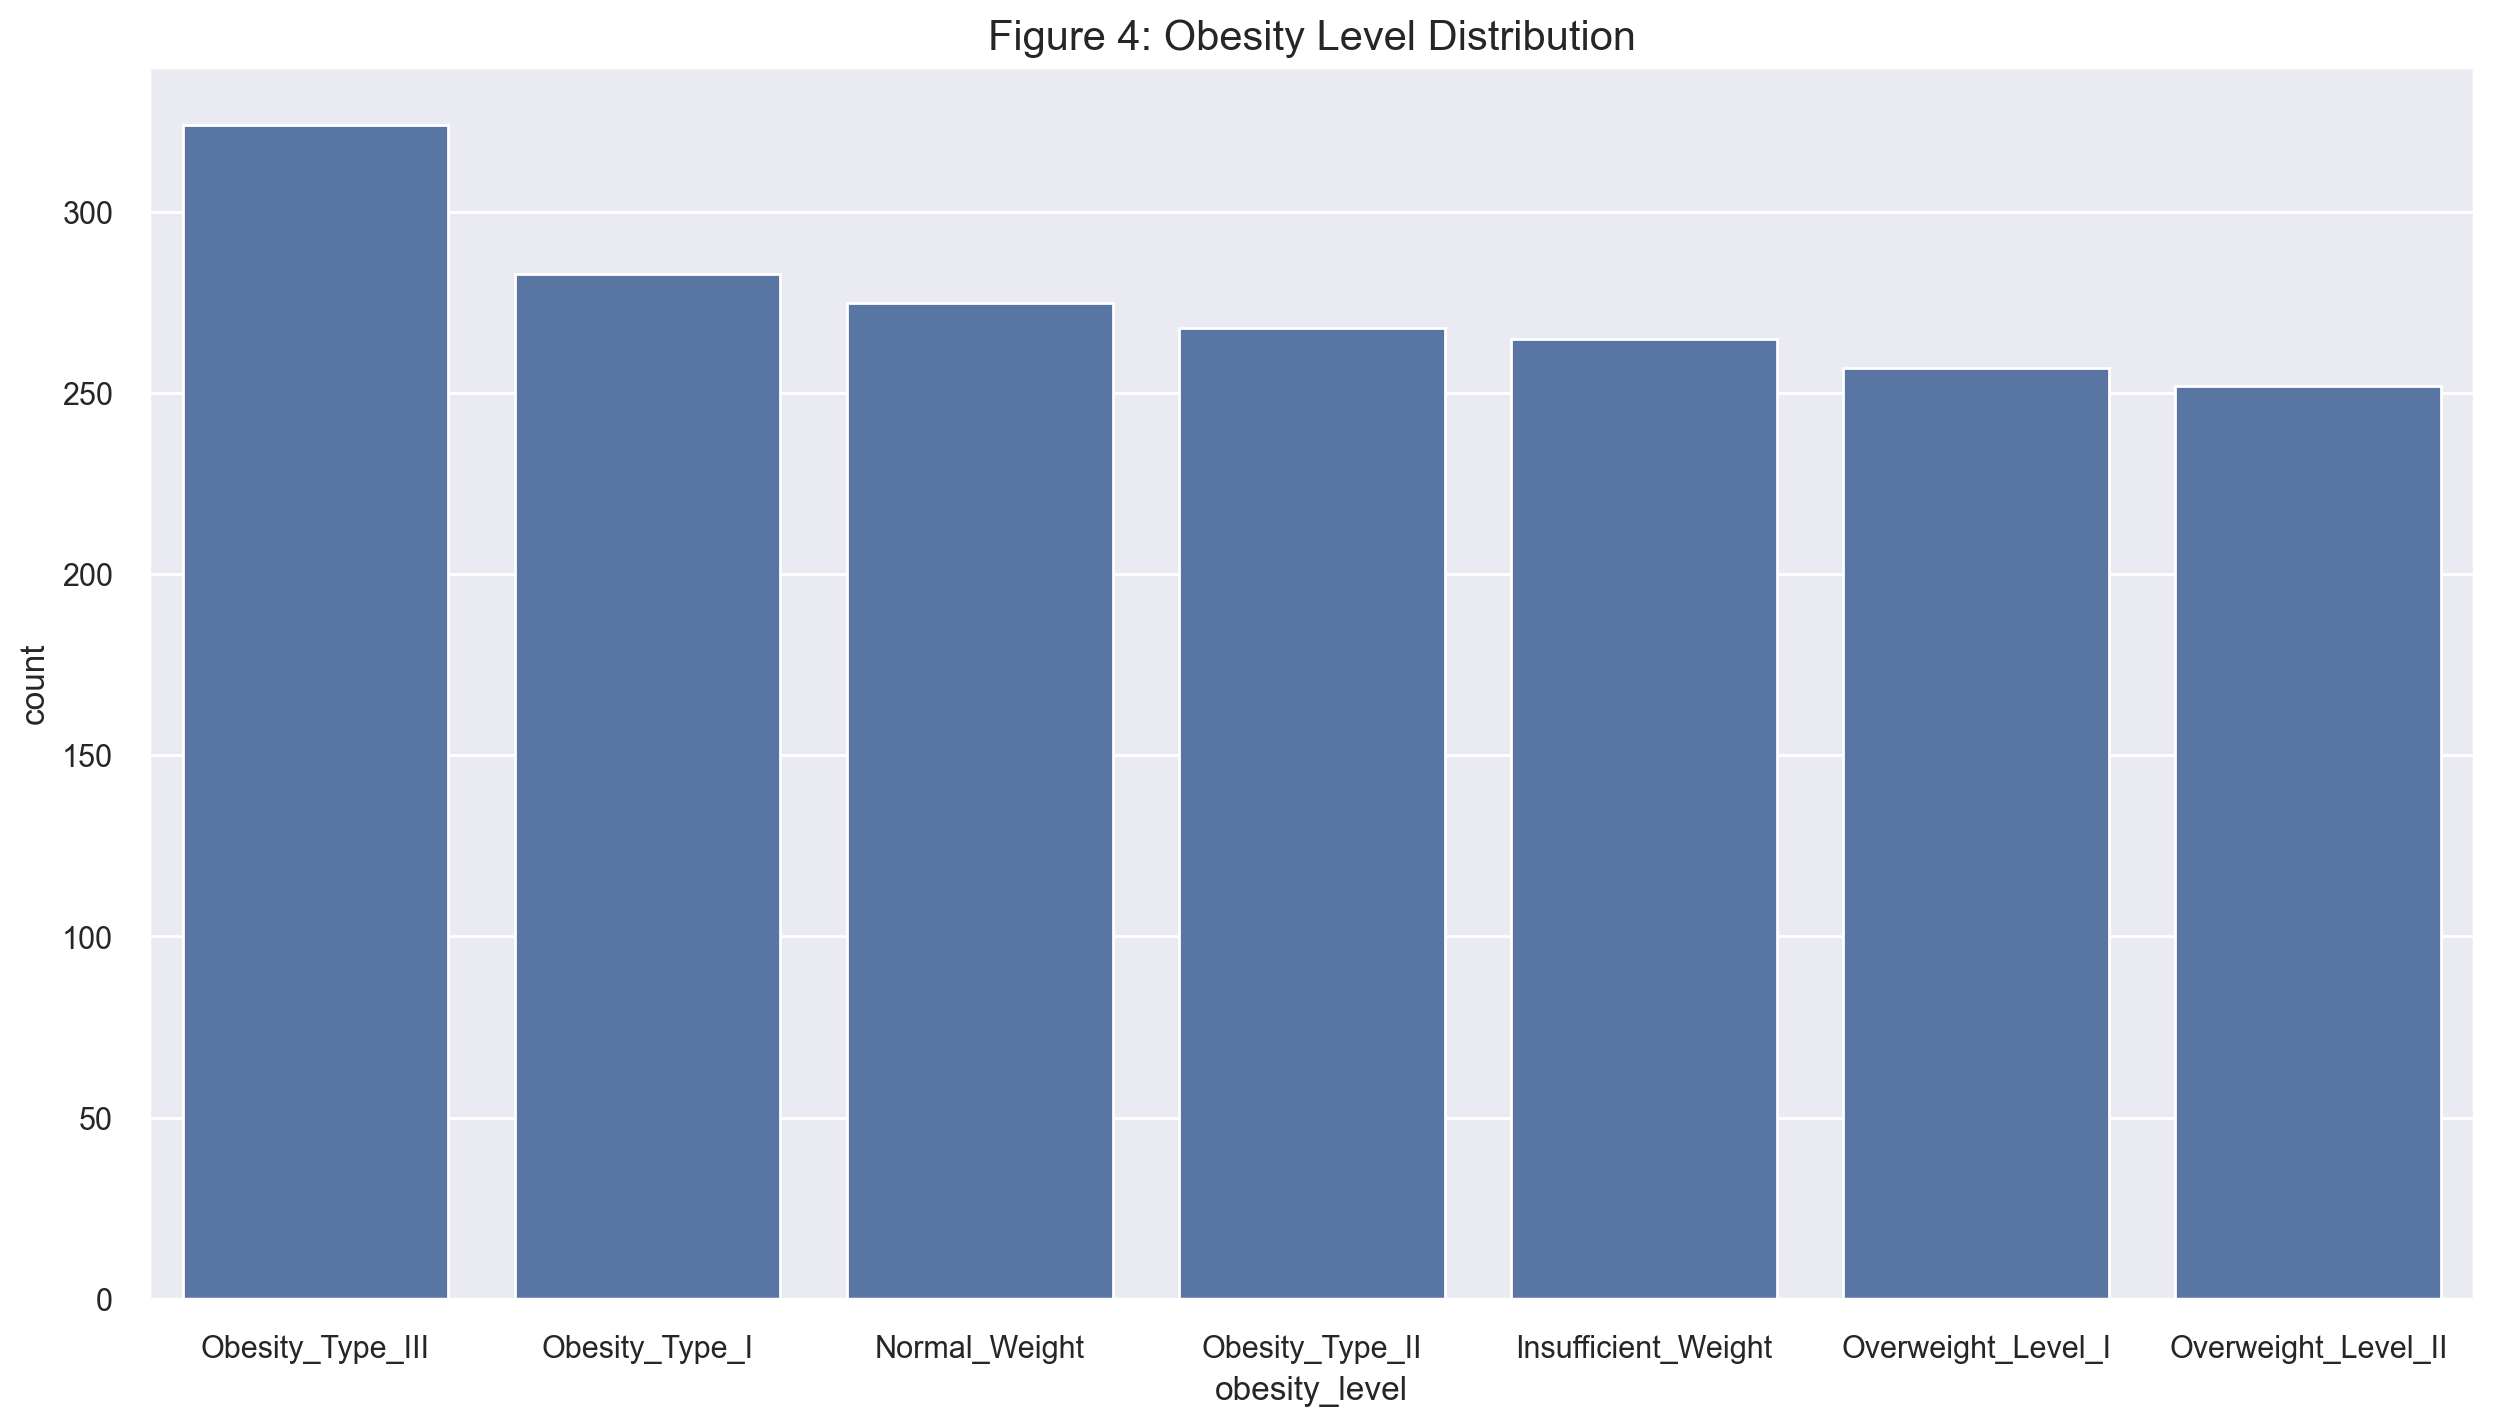

In [26]:
plt.figure(figsize = (15, 8))
fig = sns.countplot(x = 'obesity_level', data = df, palette = None, 
                    order = df['obesity_level'].value_counts().index)
fig = plt.title('Figure 4: Obesity Level Distribution', fontsize = 15)
plt.show()

We visualized the target variable `obesity_level` using a bar graph getting the variables count in descending order. From figure 4 we can observe that majority of individuals are of obesity type I and from the dataset least count is for the individuals with insufficient weight.

#### Histogram of Age

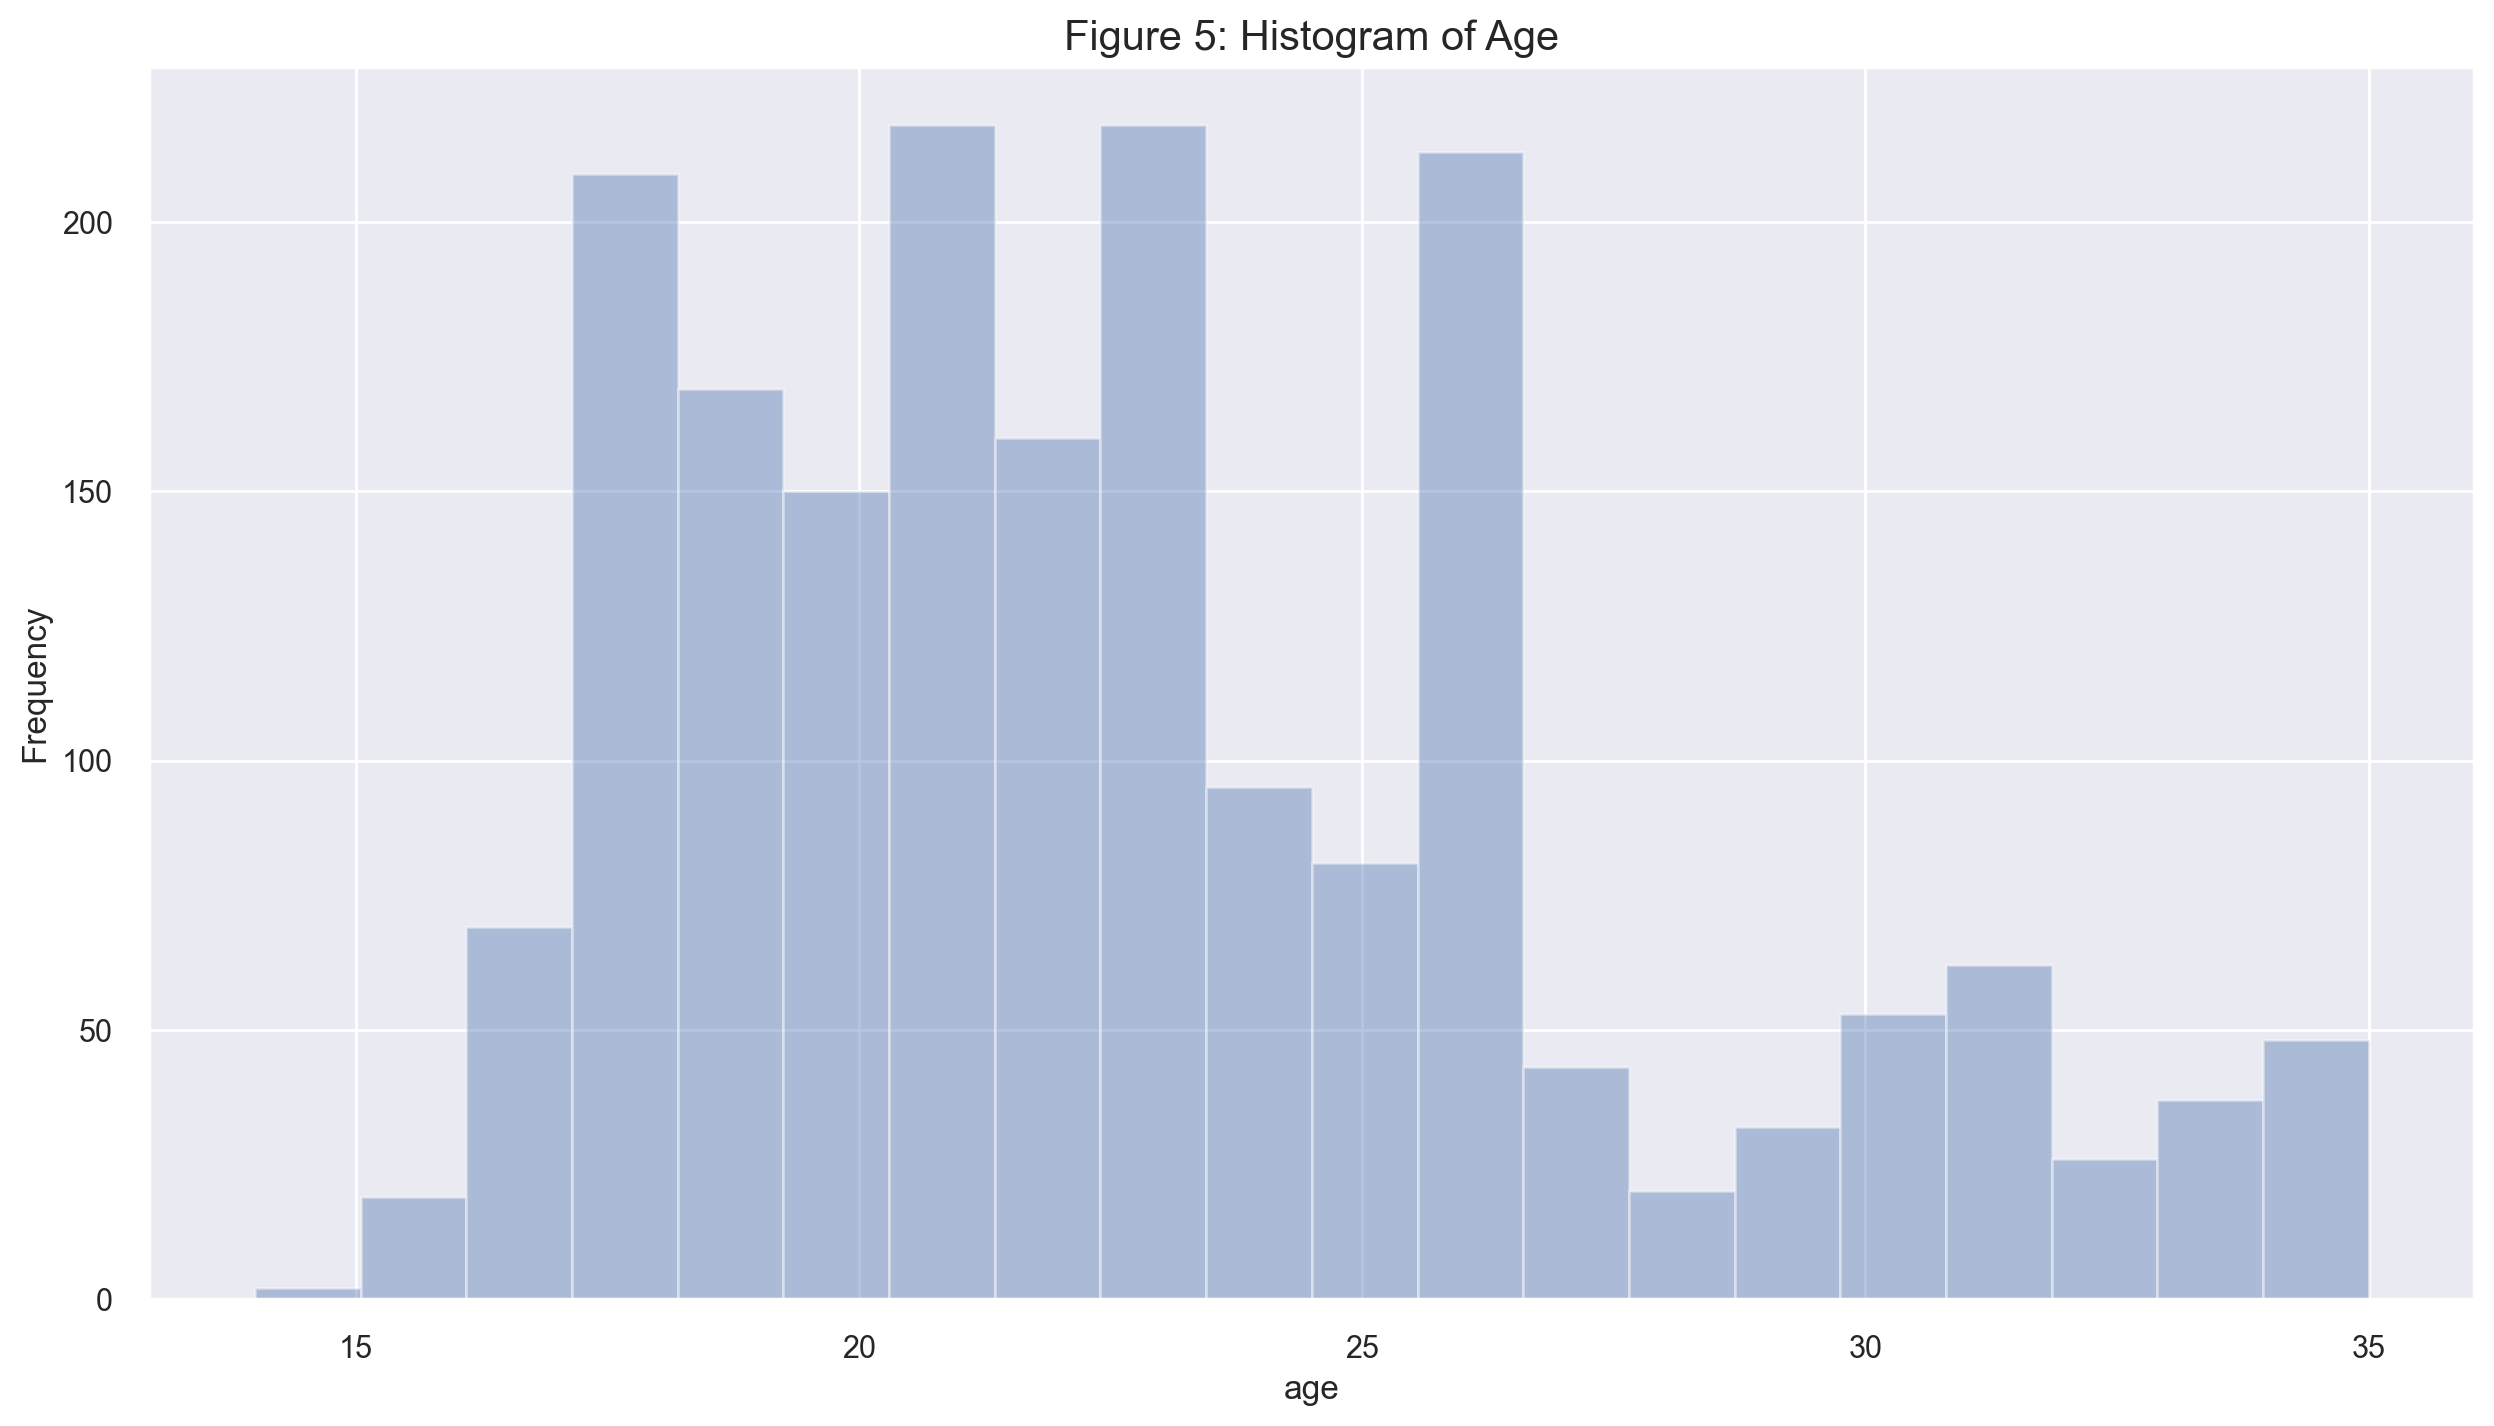

In [27]:
# histogram for age
plt.figure(figsize = (15, 8))
sns.distplot(df['age'], kde=False, bins=20).set_title('Figure 5: Histogram of Age', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

From figure 5 we can see that age among the individuals is positively skewed. We can observe that the majority of the individuals are below 30 years of age.

#### Pie Chart of Gender

From figure 6 we can observe that the observations closely divided among the two genders male and female, with females being slightly higher with a percentage of 51%.

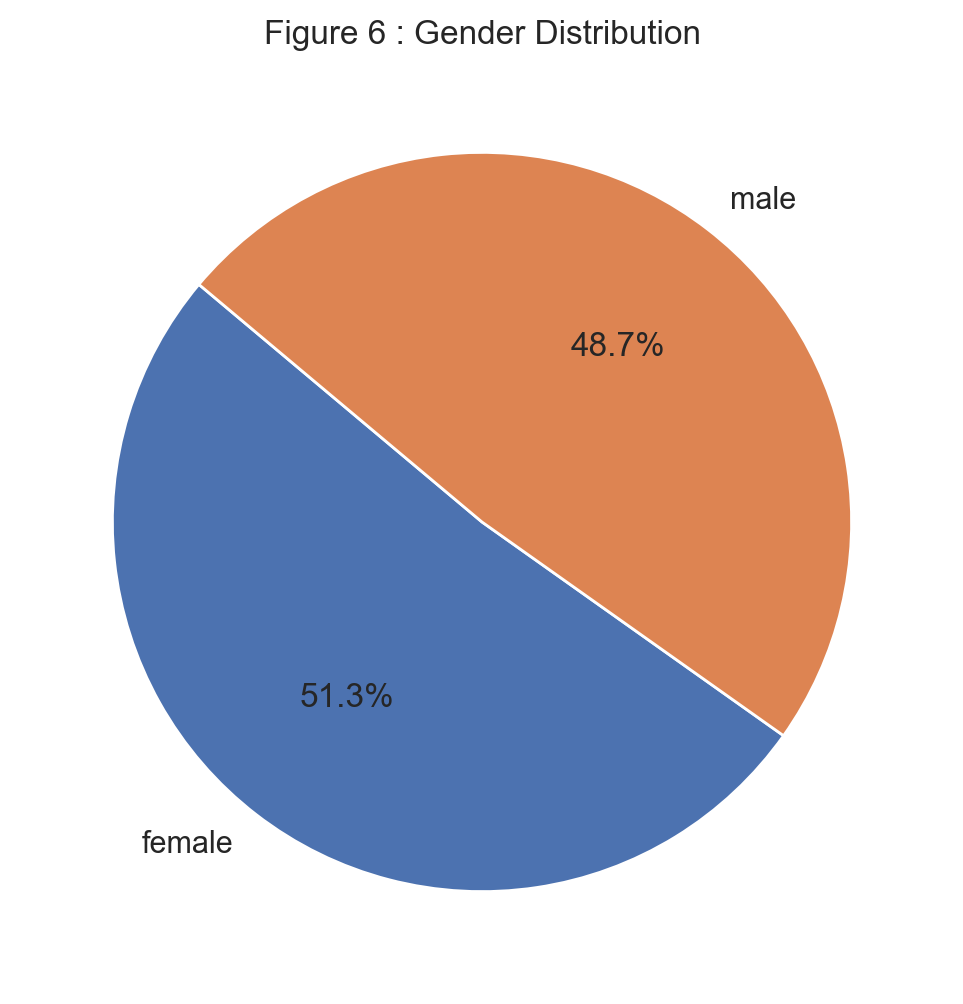

In [28]:
# pie chart for gender
plt.figure(figsize=(6,6))
plt.pie(df['gender'].value_counts(), labels=df['gender'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Figure 6 : Gender Distribution')
plt.show()

#### Bar chart of food between meals 

In our dataset the individuals are sometimes taking food in between their meals. This can be considered as a reason for the obesity. We can find more about these features in the phase 2 of the report.

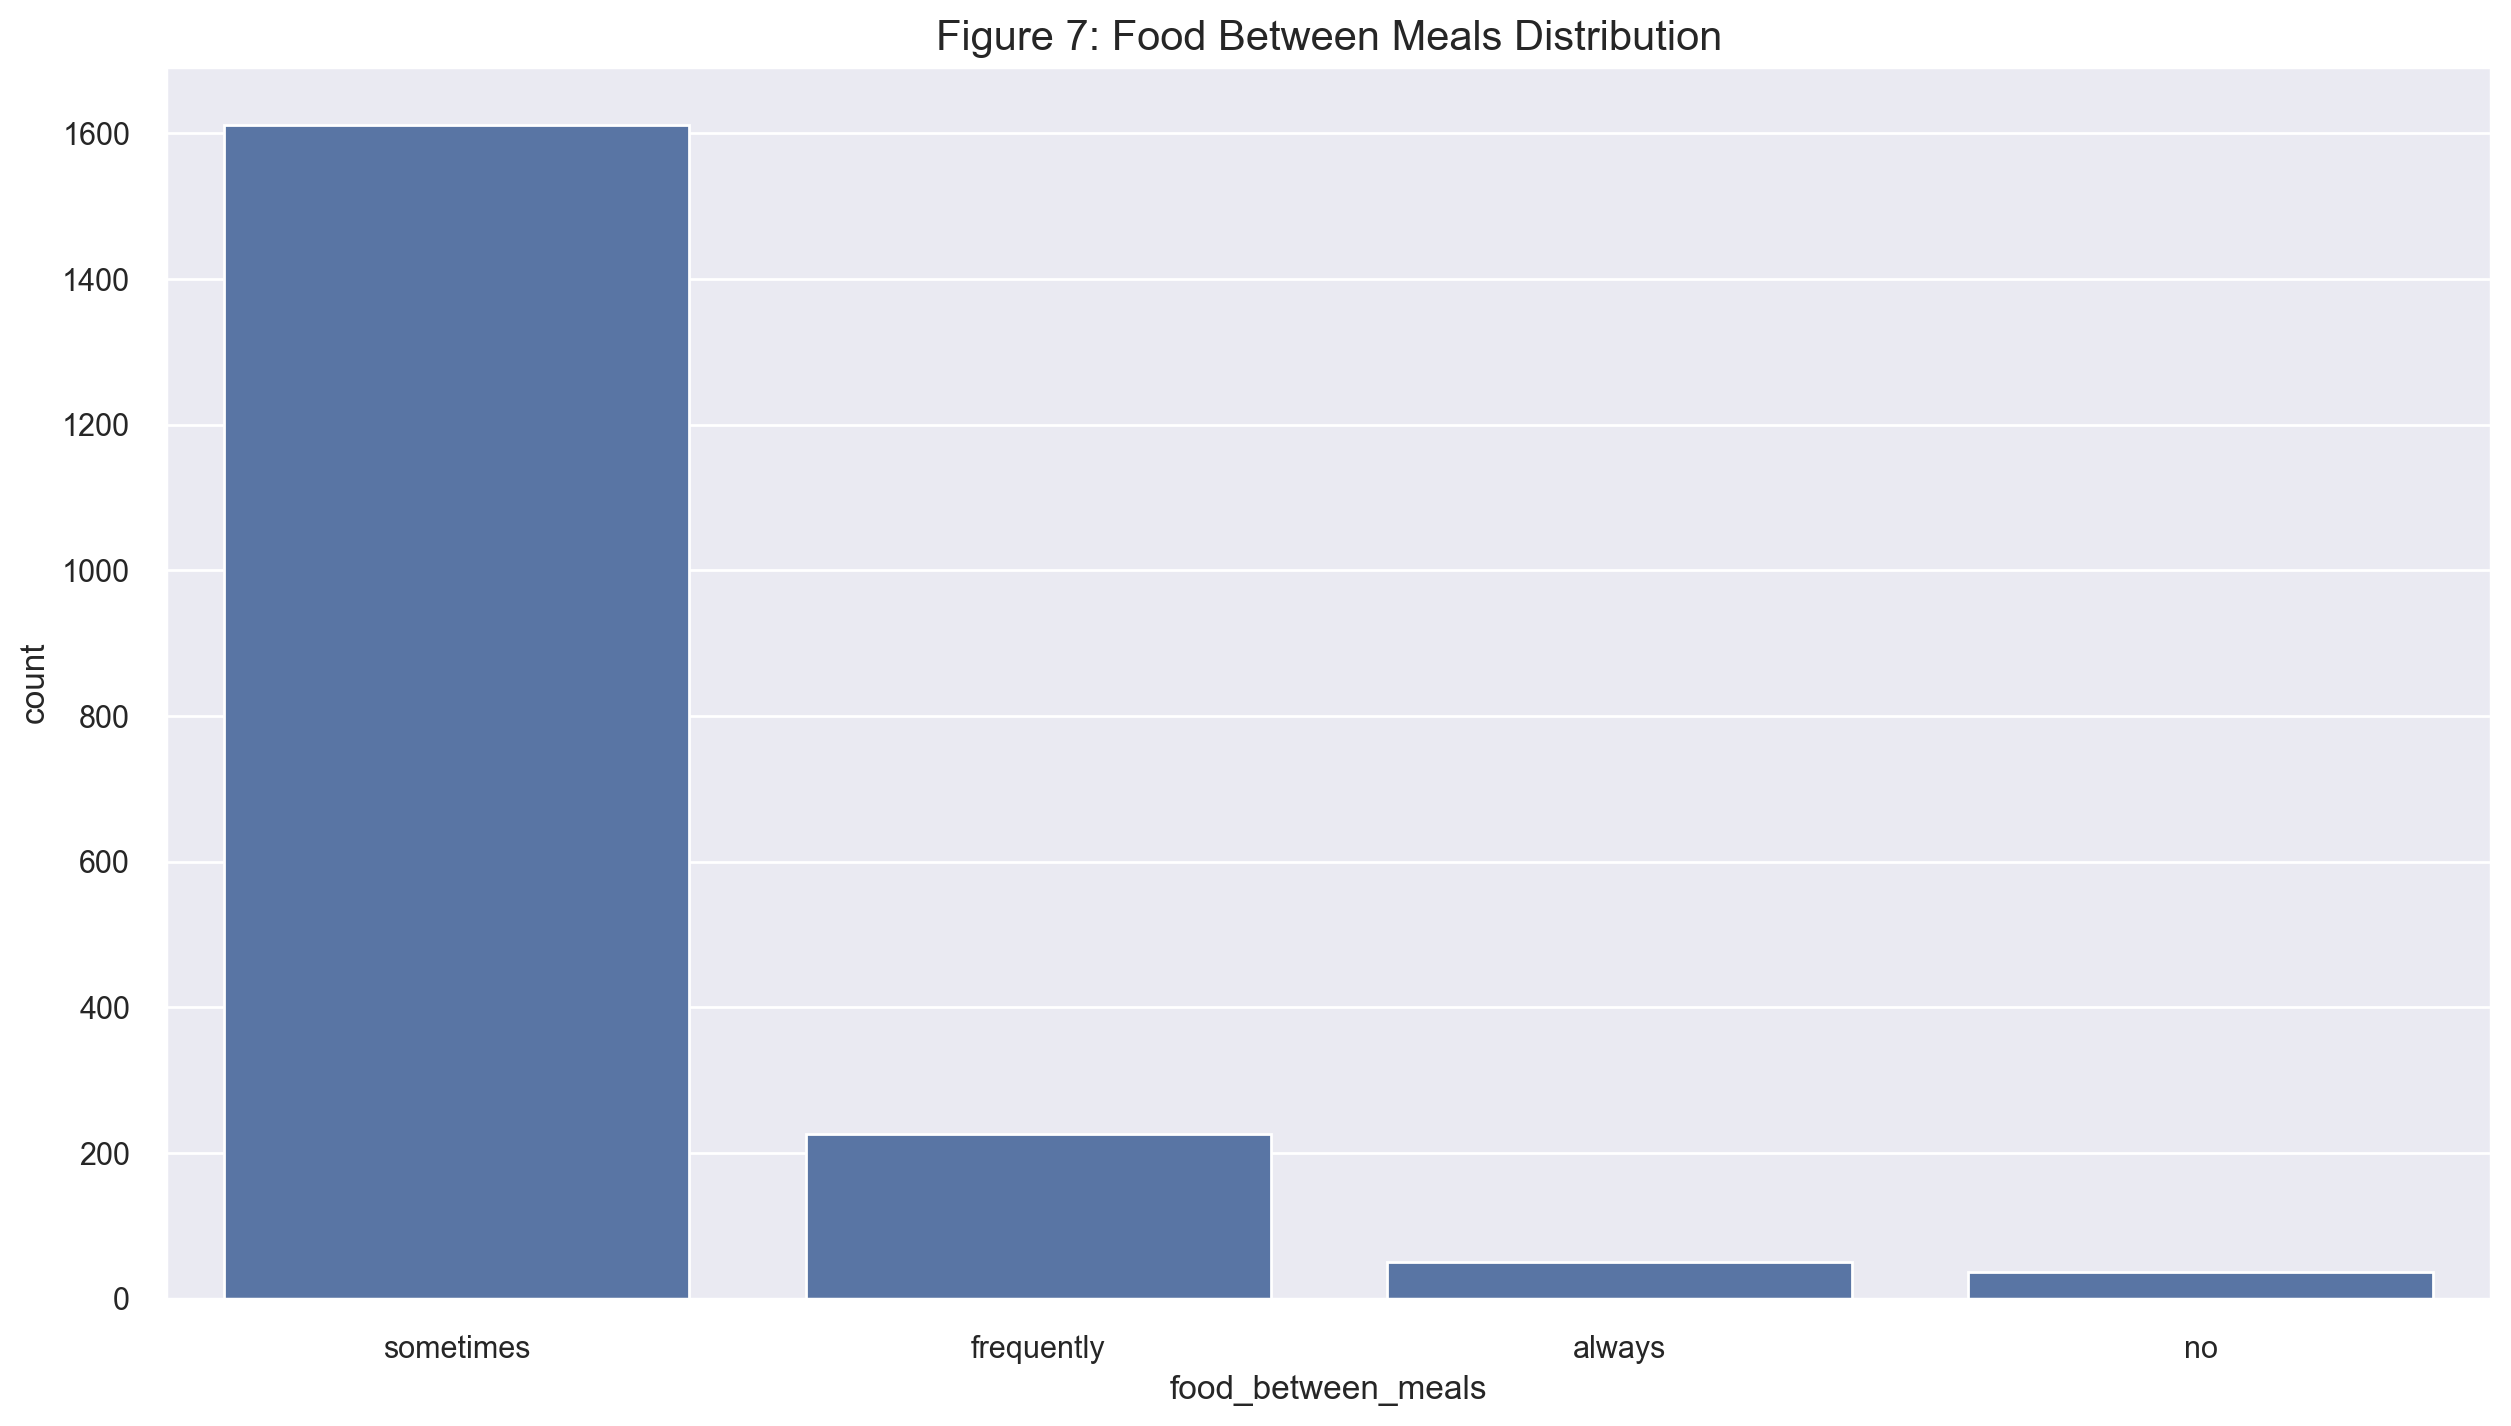

In [29]:
# bar chart for food between meals
plt.figure(figsize = (15, 8))
fig = sns.countplot(x = 'food_between_meals', data = df, palette = None, 
                    order = df['food_between_meals'].value_counts().index)
fig = plt.title('Figure 7: Food Between Meals Distribution', fontsize = 15)
plt.show()

### Two-Variable Visualization

After one variable visualizations, we will focus our attention towards the two-variable visualizations

#### Scatterplot of height and weight

The scatterplot in figure 8 shows that there is a weak linear relationship between height and weight. When the height increases we can see that the weigth increases as well.

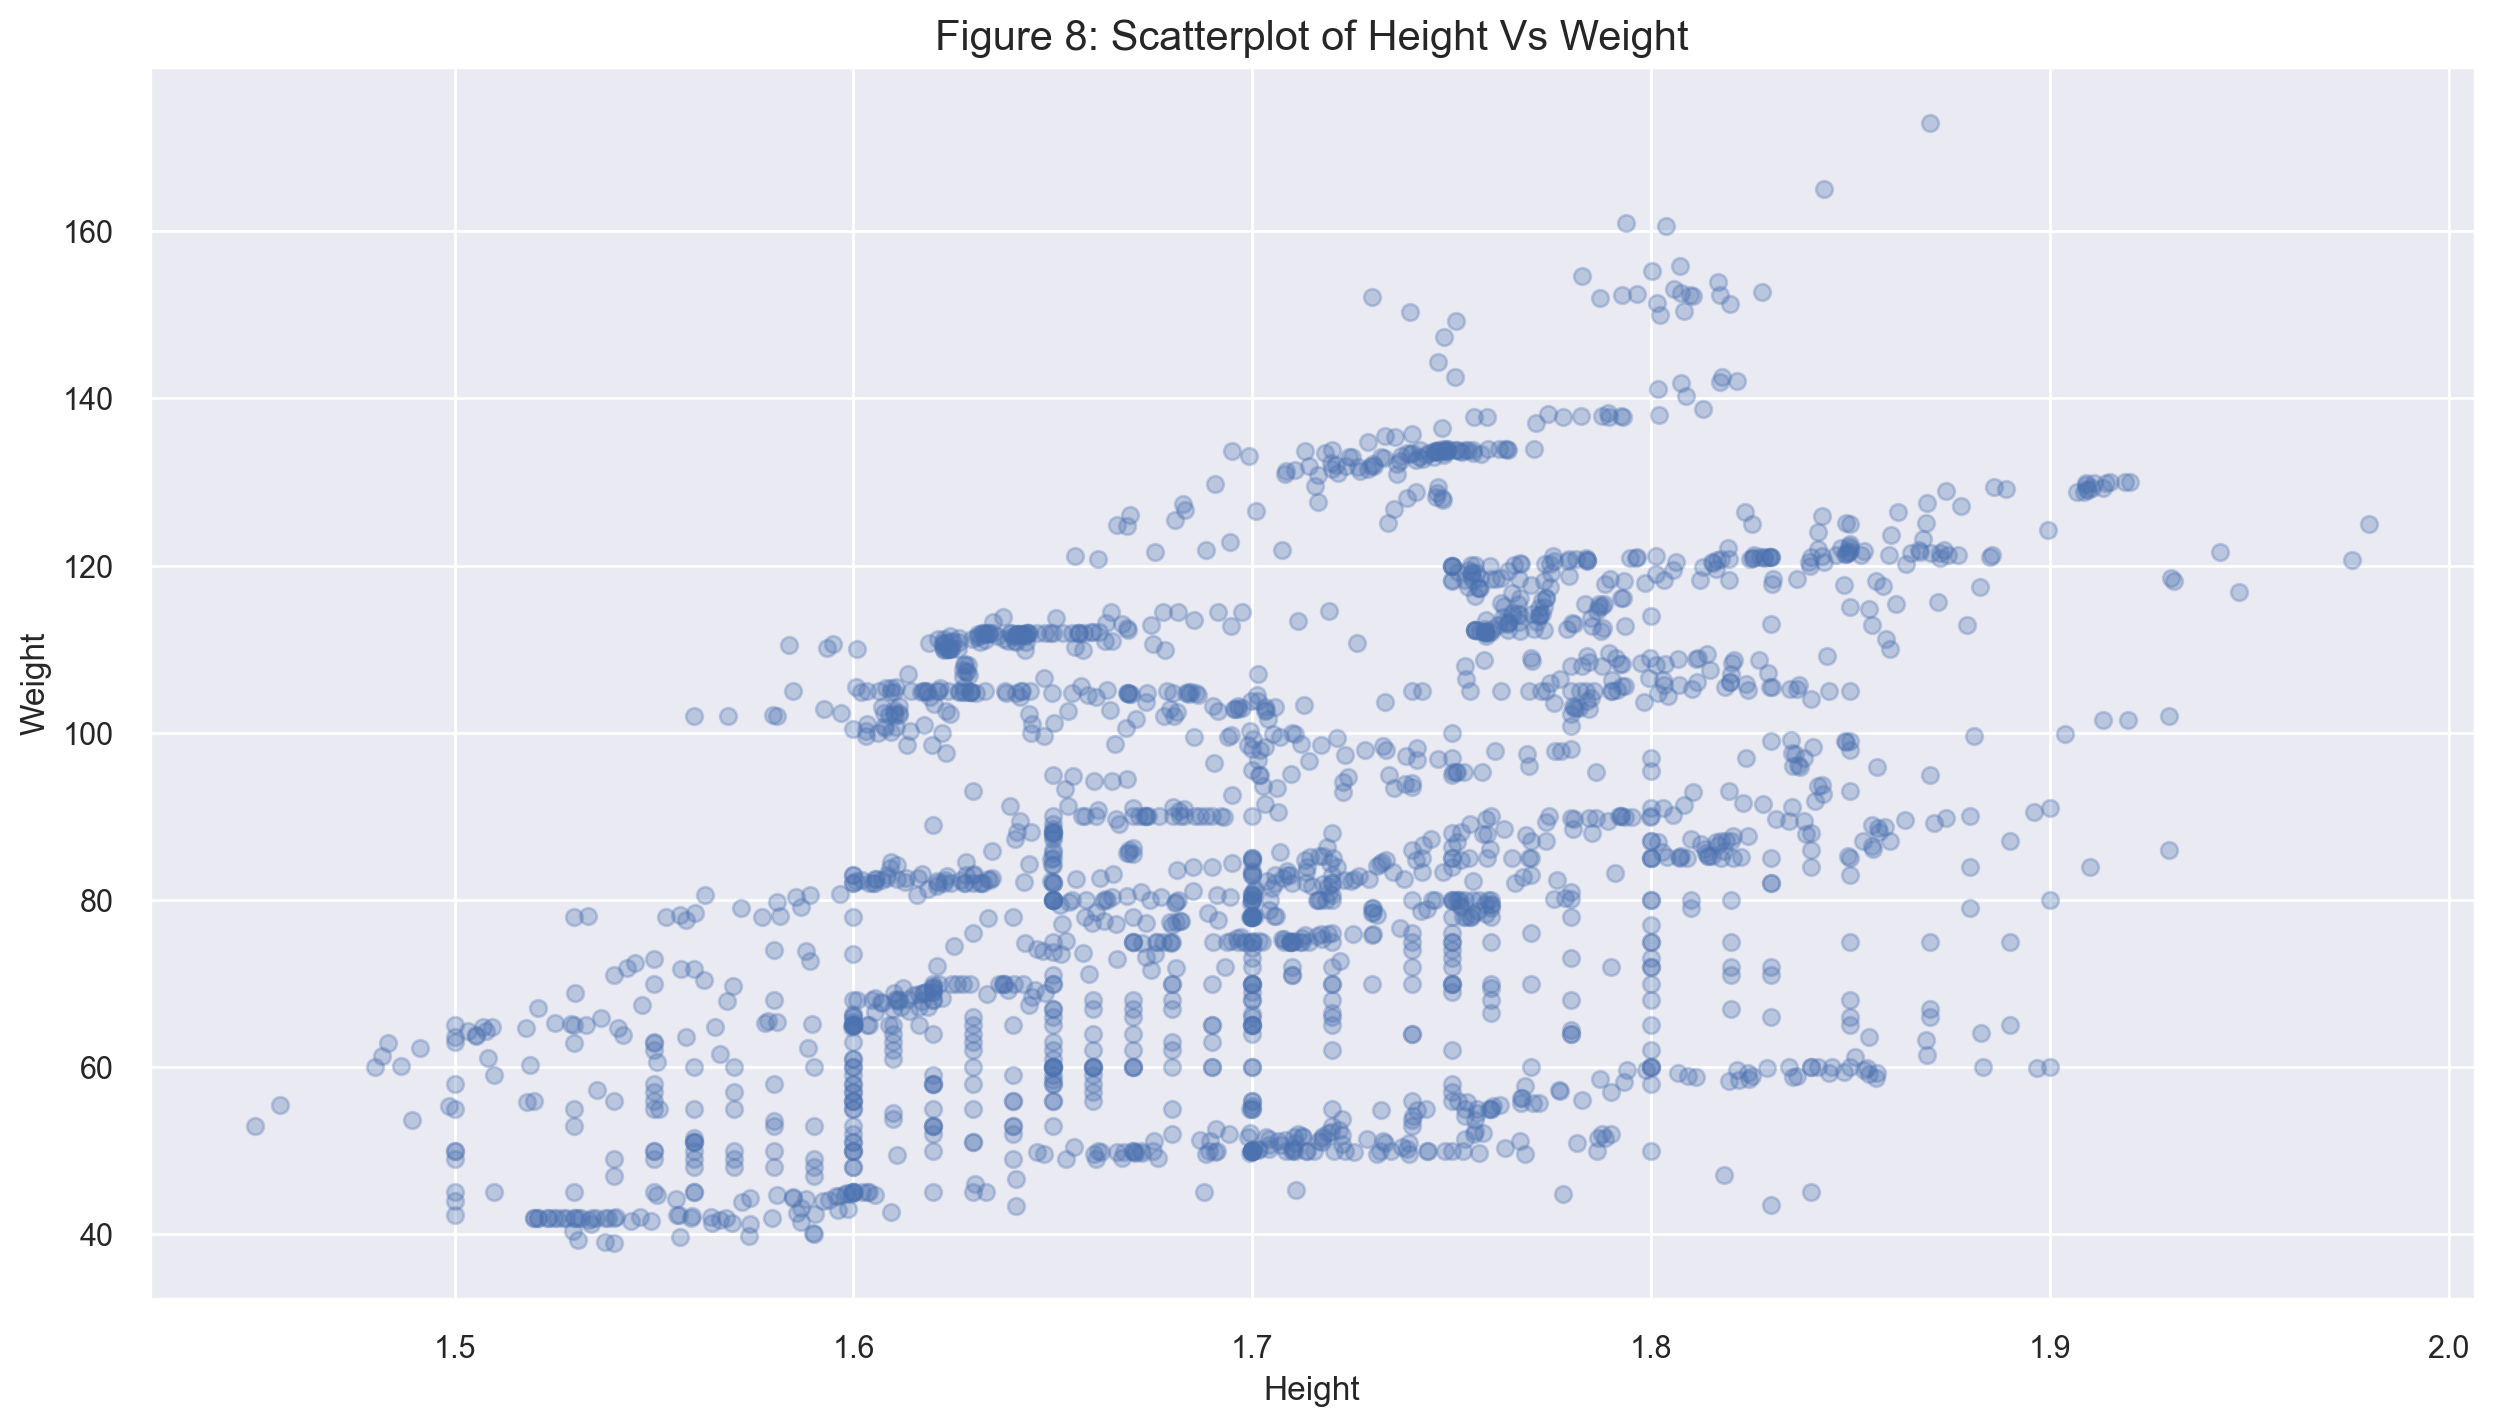

In [30]:
# Scatterplot of height and weight
plt.figure(figsize = (15,8))
plt.scatter(x='height', y='weight', data=df, alpha = 0.3)
plt.title('Figure 8: Scatterplot of Height Vs Weight', fontsize = 15)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid(True)
plt.show();

#### Scatterplot of Age and weight

In figure 9, we can observe there is no relationship between the age and weight of the individuals.

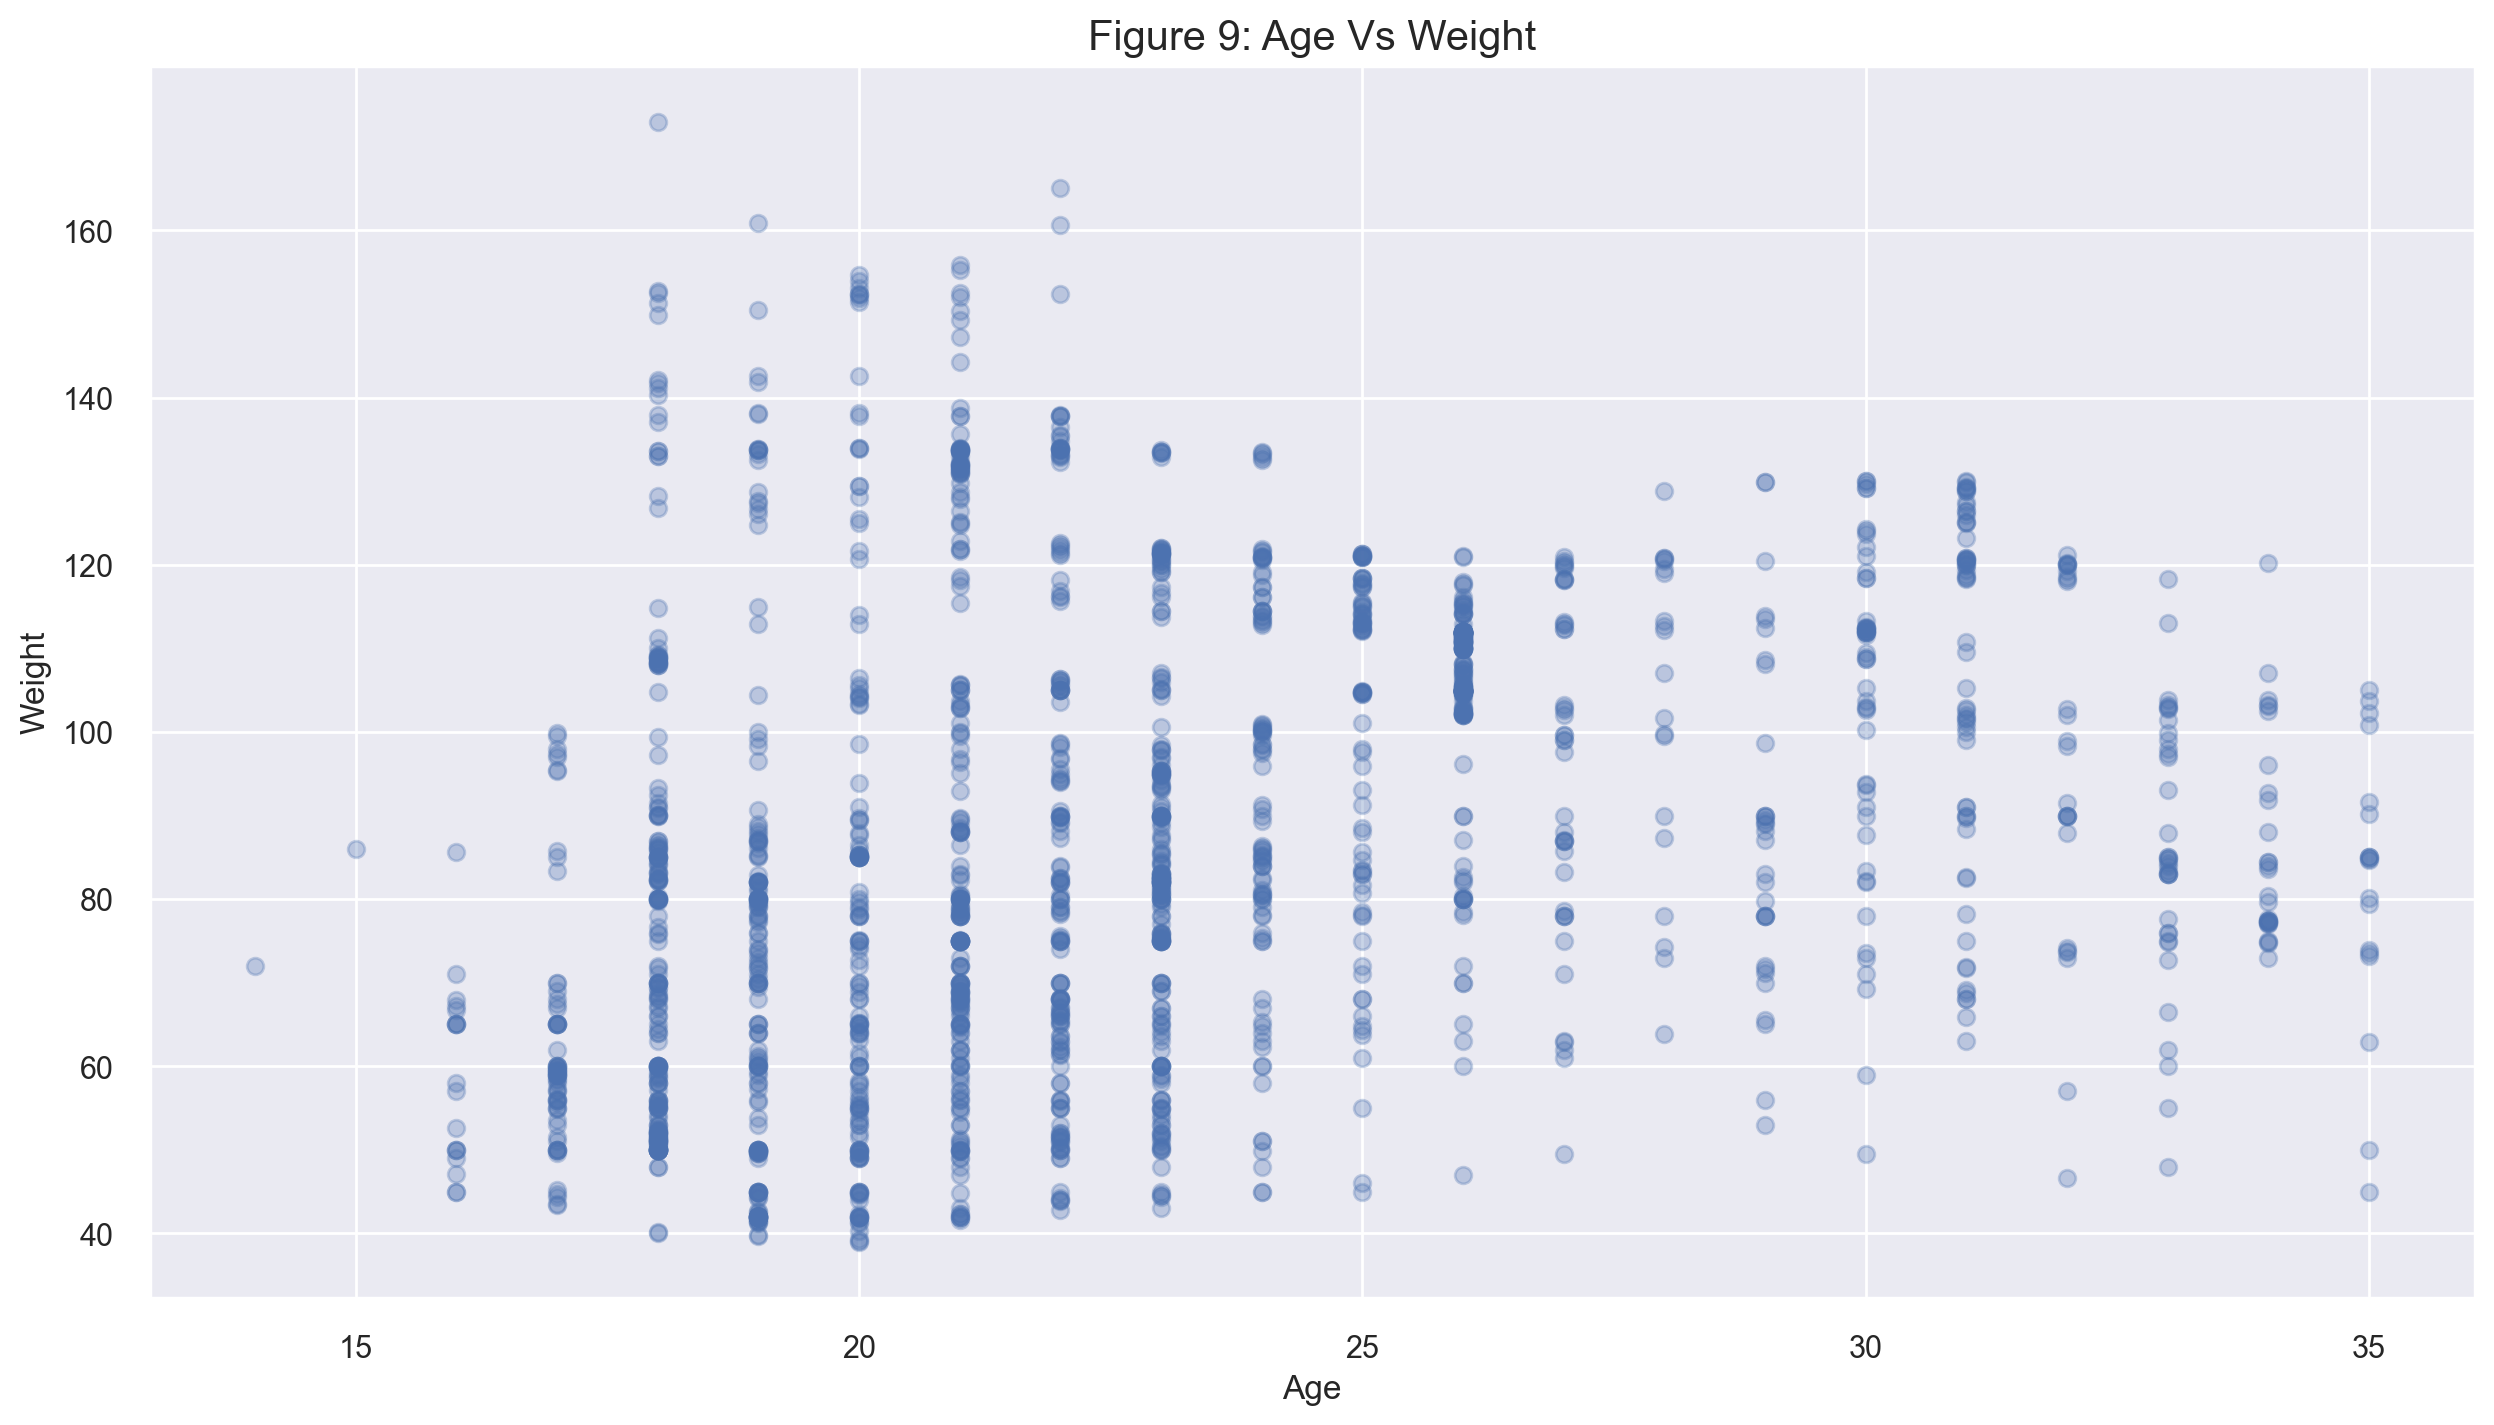

In [31]:
# Scatterplot of age and weight
plt.figure(figsize = (15,8))
plt.scatter(x='age', y='weight', data=df, alpha = 0.3)
plt.title('Figure 9: Age Vs Weight', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

#### Bar chart of obesity level by the family history

Figure 10 interpretation implies that a higher number of individuals with a family history of obesity are suffering from obesity type III. At a glance we can conclude that family history has a effect on the level of obesity of an individual. 

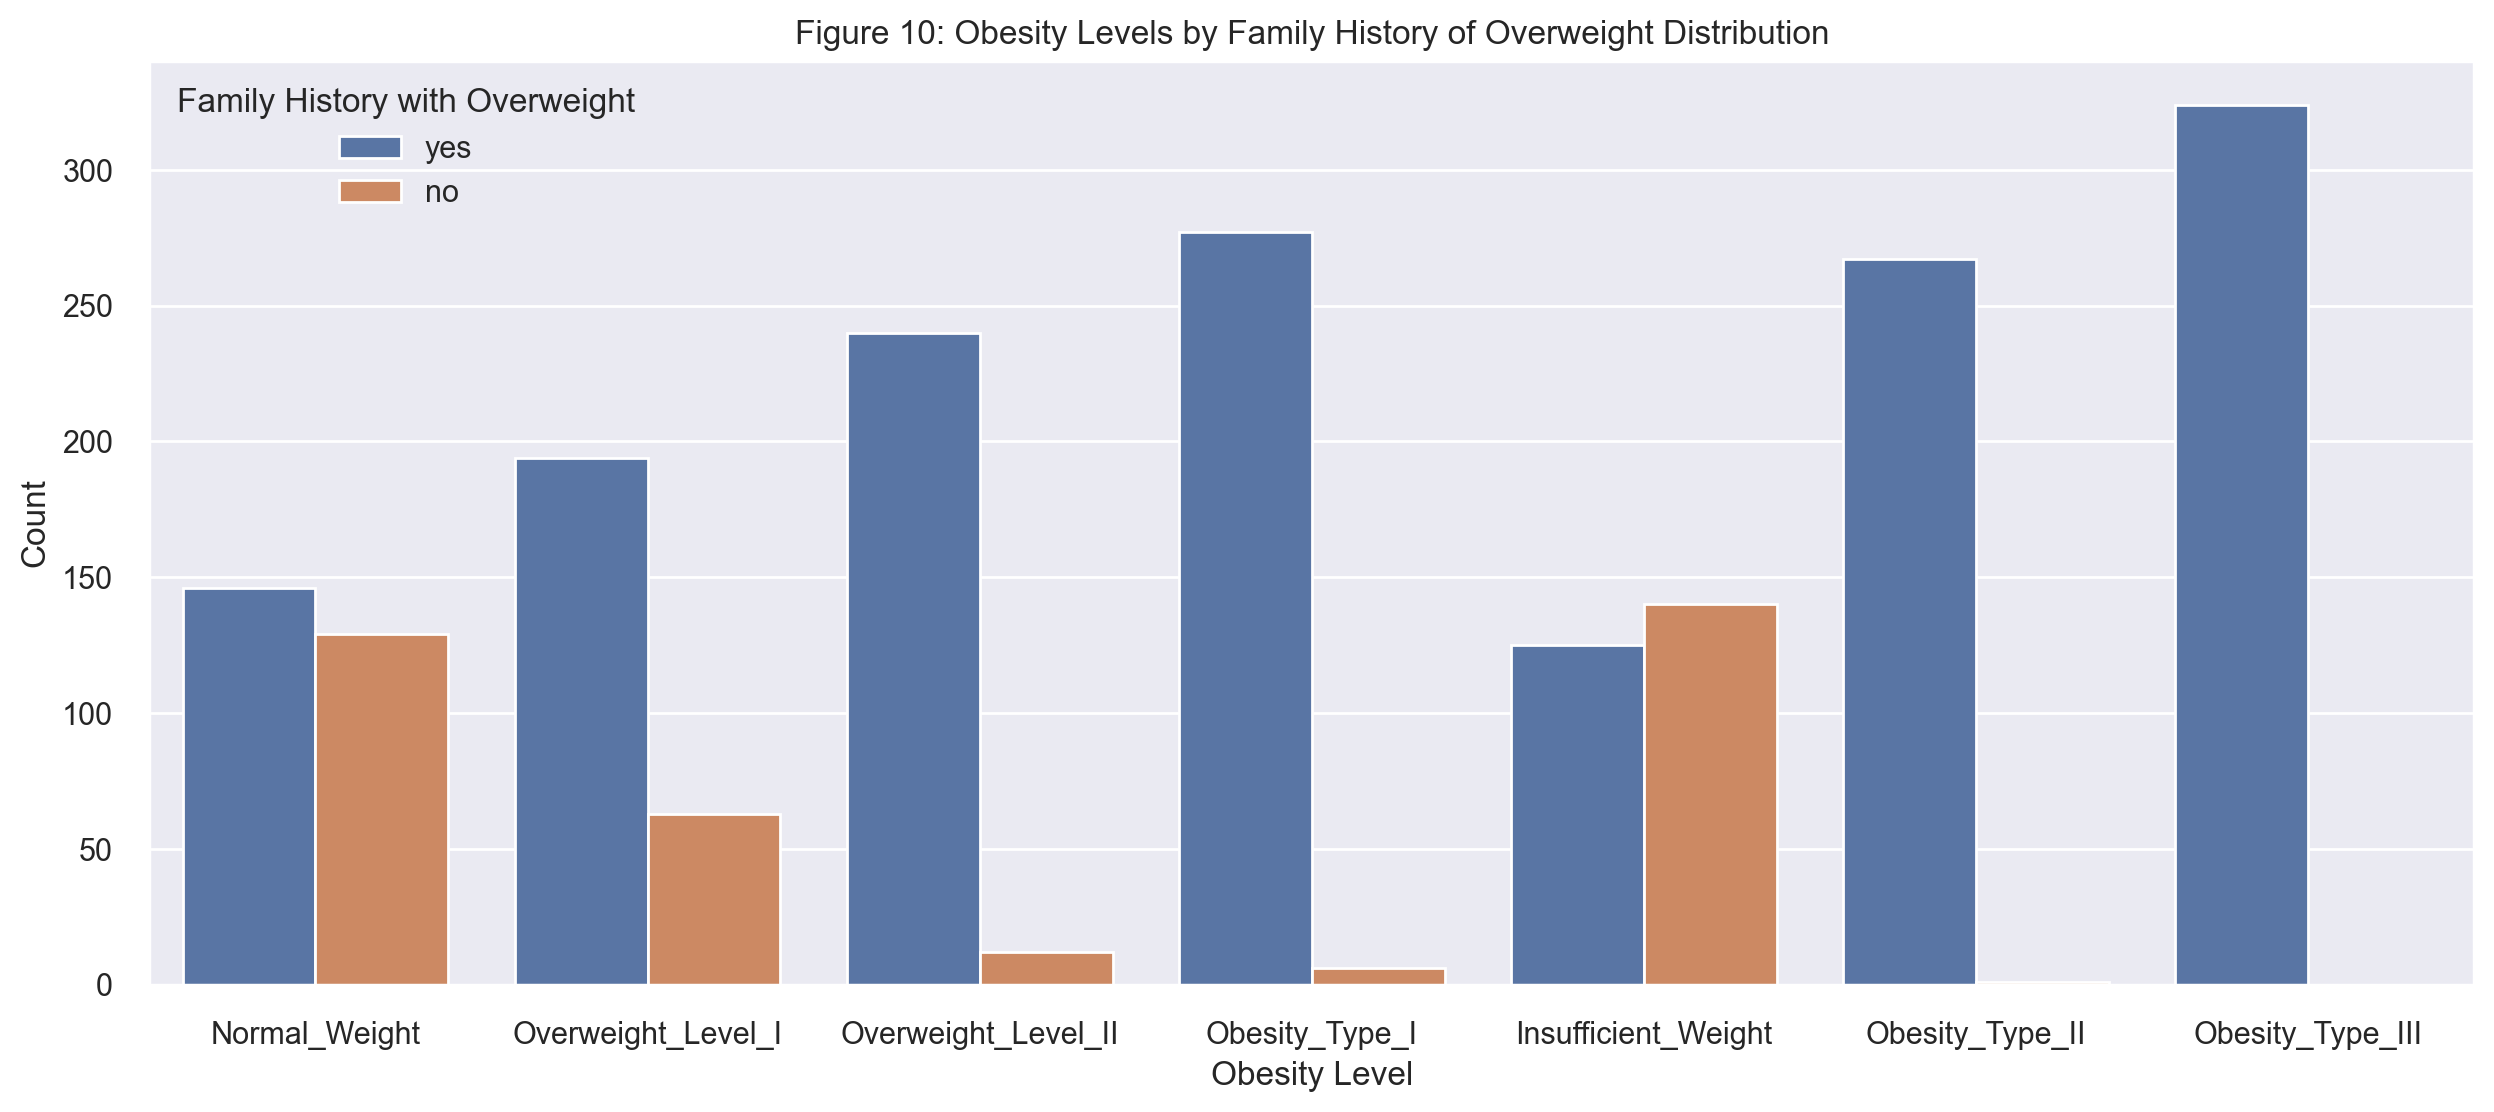

In [32]:
# Bar chart of obesity level by the family history
plt.figure(figsize=(15, 6))
sns.countplot(x='obesity_level', hue='family_history', data=df)
plt.title('Figure 10: Obesity Levels by Family History of Overweight Distribution')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.legend(title='Family History with Overweight')
plt.show()

####  Bar plot for obesity levels  and age group

Figure 11 shows that the relatively young age individuals tend to be more overweight type III and type II and type I, which means they tend to be more overweight overall.

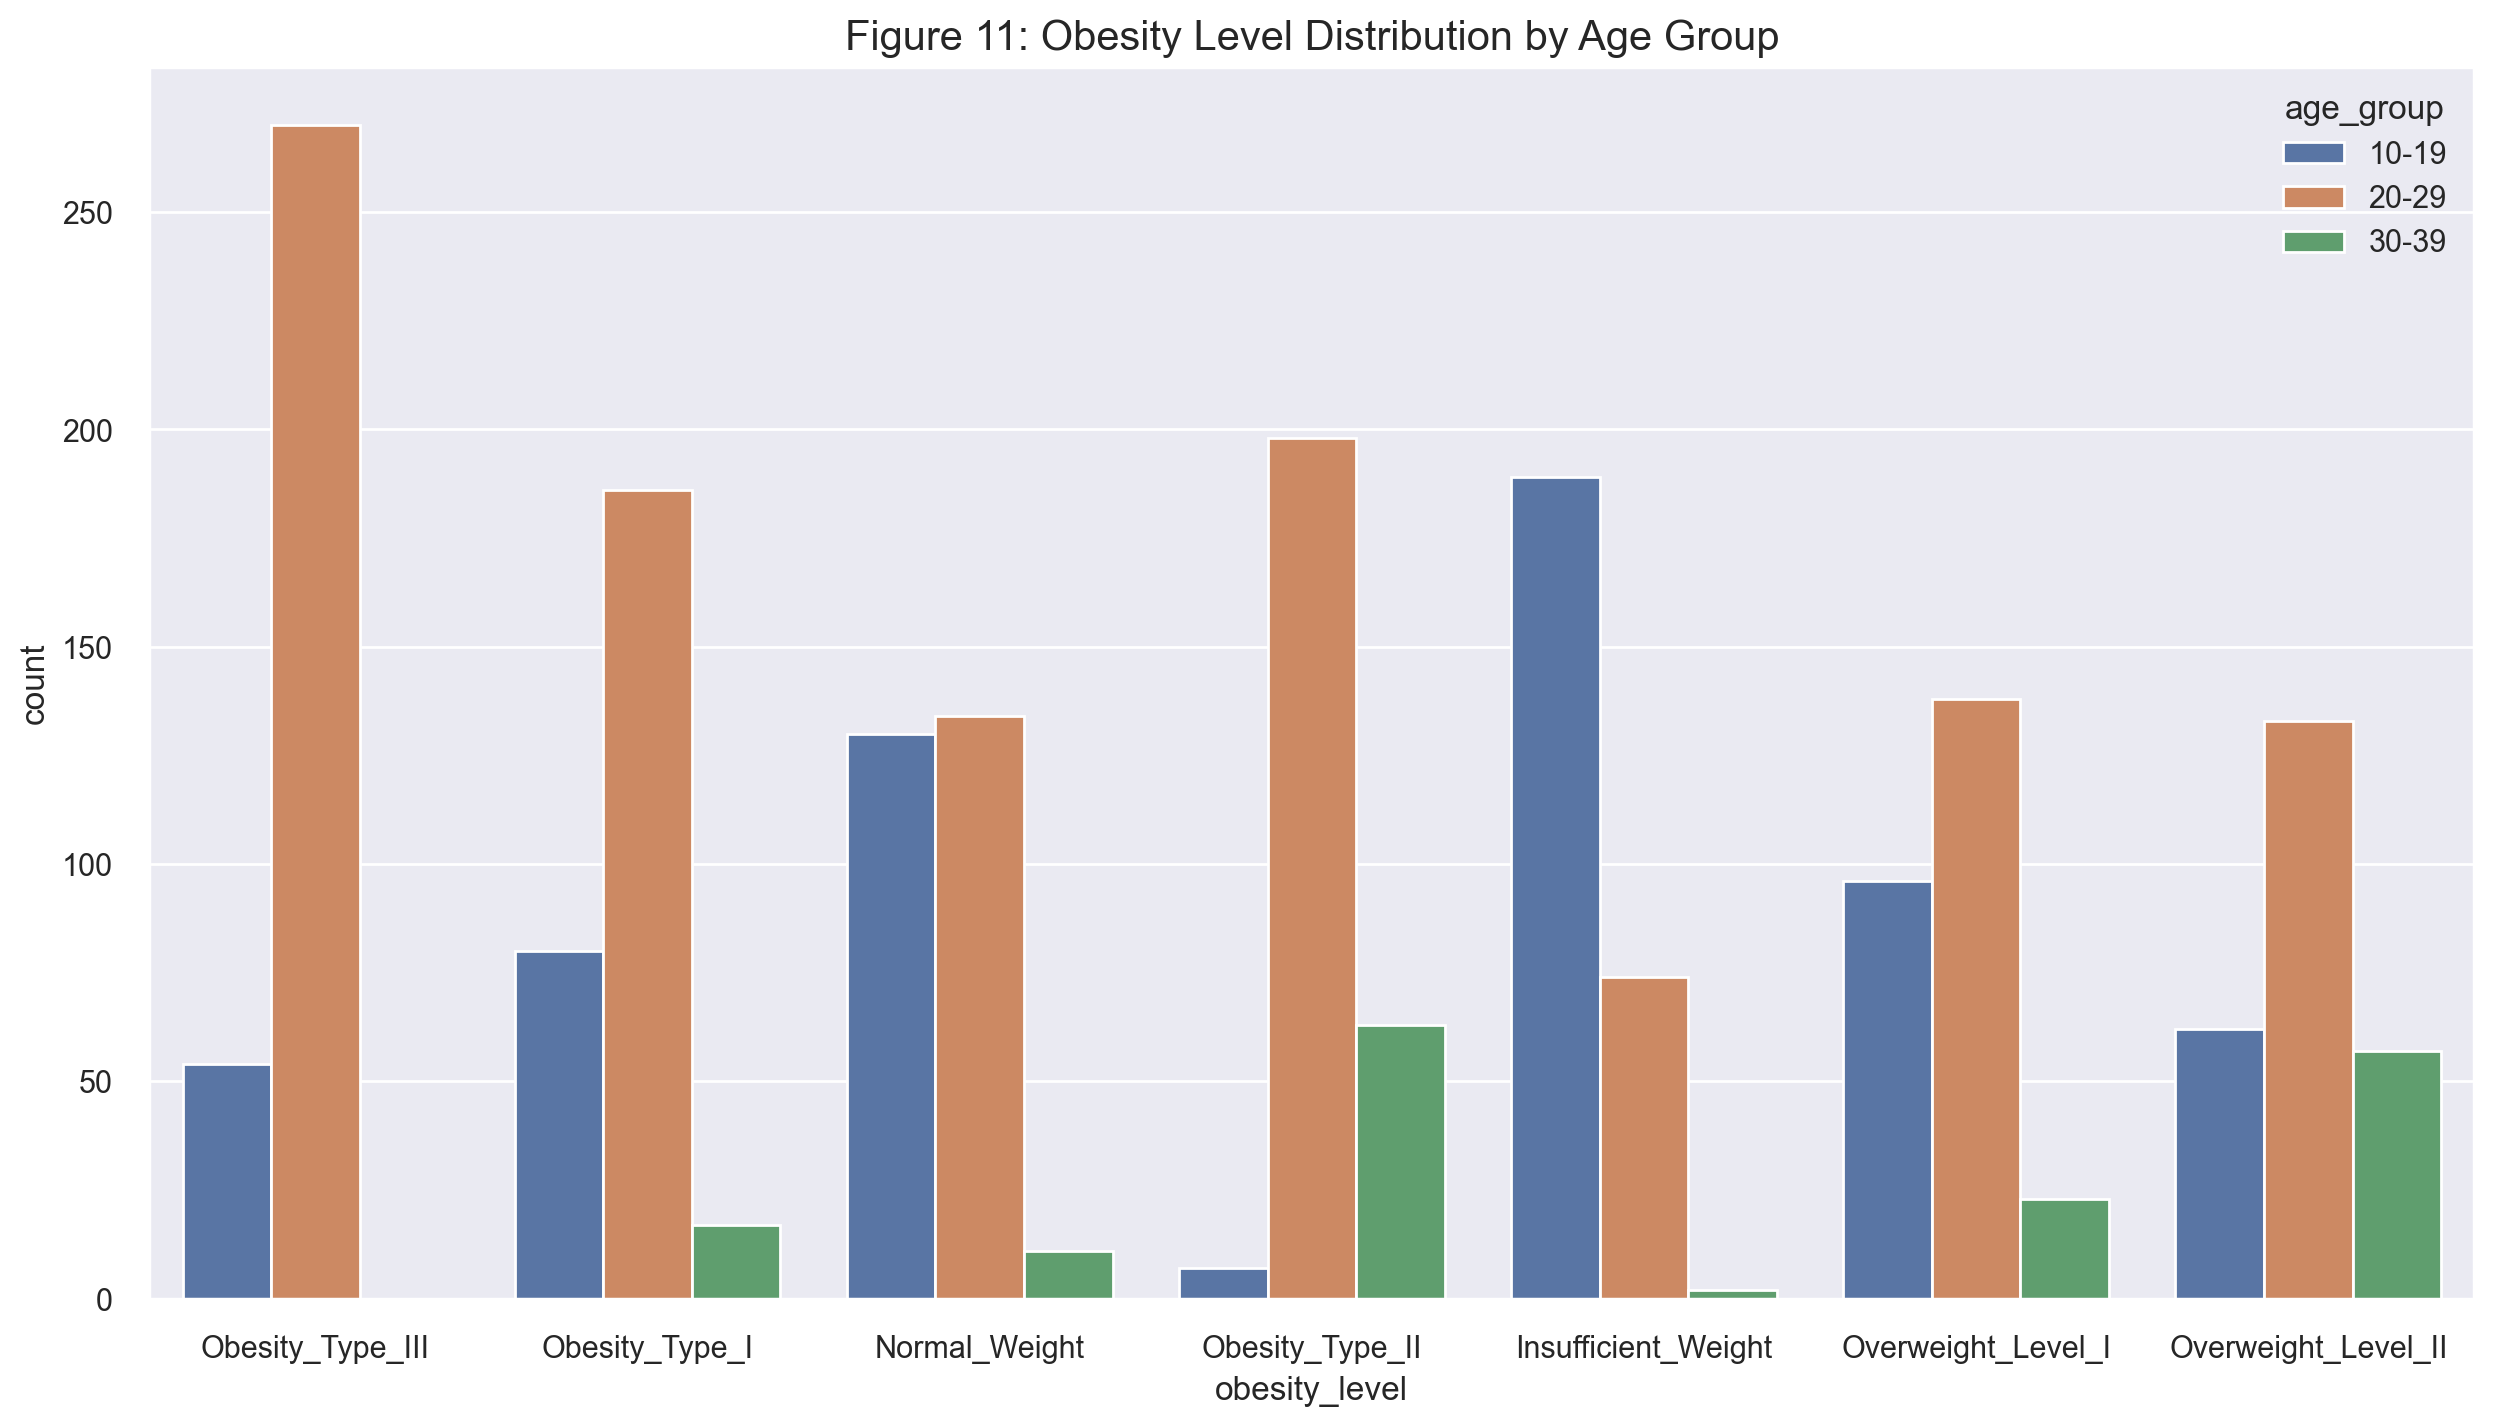

In [33]:
# splitting age into ranges
df['age_group'] = pd.cut(df['age'], bins=[10, 20, 30, 40], labels=['10-19', '20-29', '30-39'])
 
# Plotting the bar plot for obesity level by age group
plt.figure(figsize=(15, 8))
fig = sns.countplot(x='obesity_level', hue='age_group', data=df, palette=None,
                    order=df['obesity_level'].value_counts().index)
fig.set_title('Figure 11: Obesity Level Distribution by Age Group', fontsize=15)
plt.show()

### Three-Variable Visualization

#### Correlation graph of age, height, weight

Figure 12 shows that`weight` and `height` has the strongest linear relationship between the two variables among the three variables. While `age` and `weight` has the weakest relationship between them.

Text(0.5, 1.0, 'Figure 12: Age Vs Height Vs Weight')

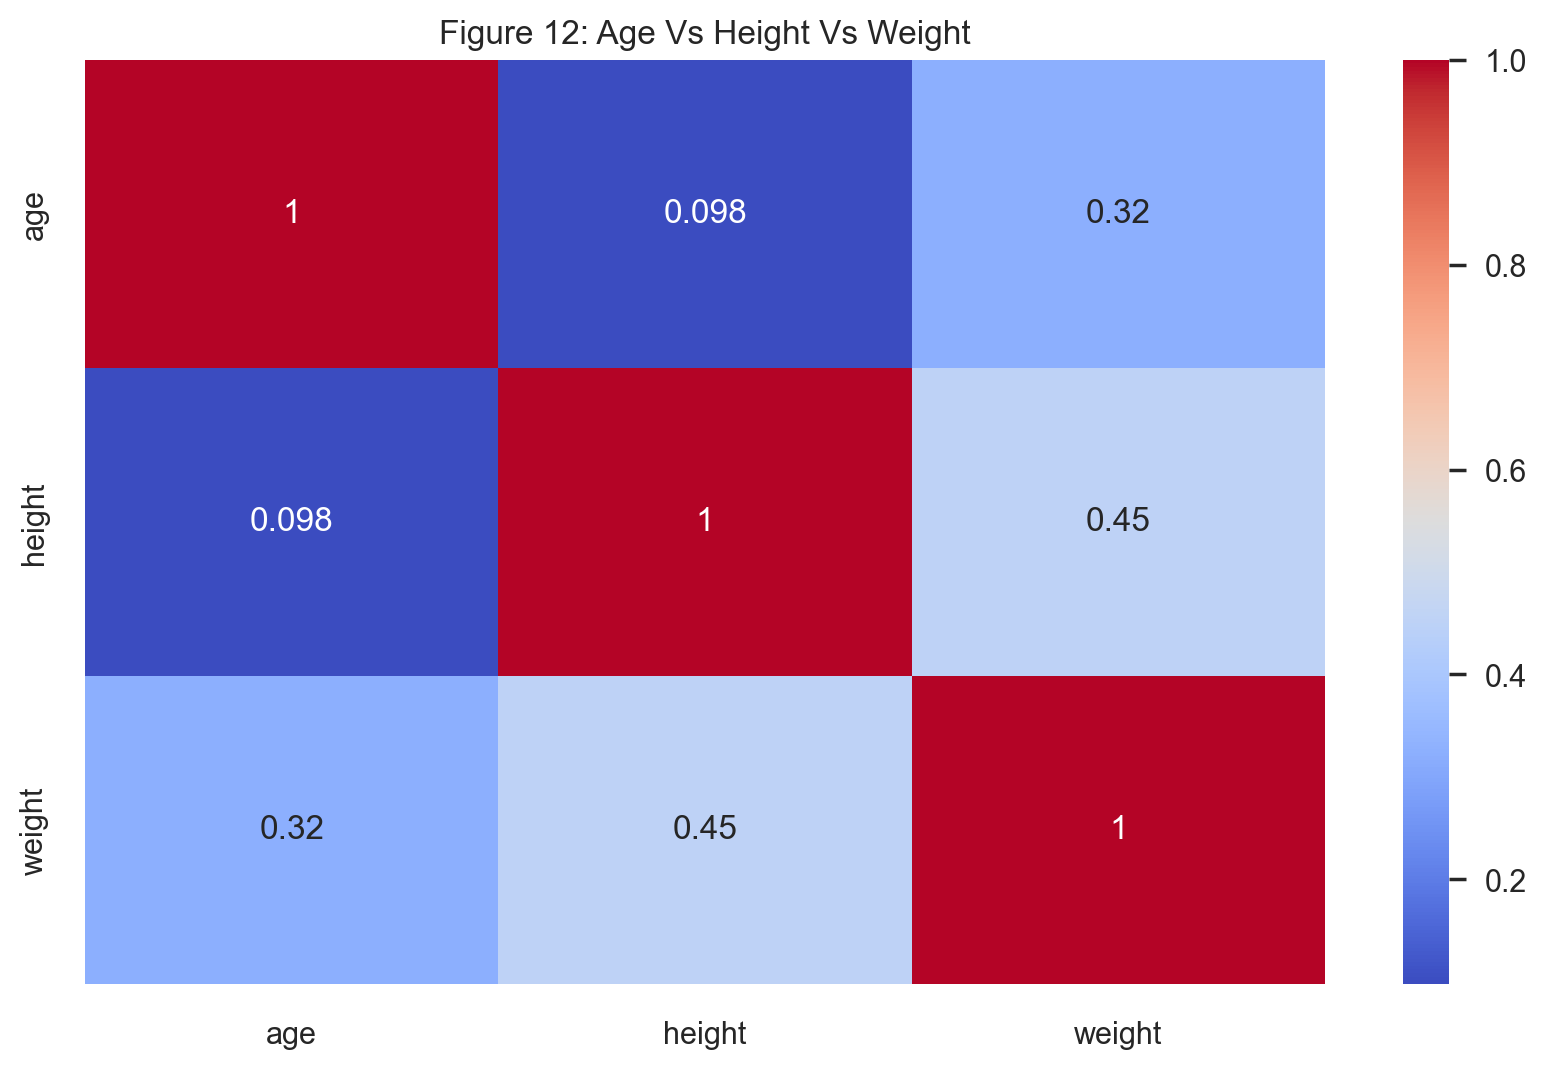

In [34]:
corr = df[['age', 'height', 'weight']].corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Figure 12: Age Vs Height Vs Weight', fontsize = 12)

#### Scatterplot of weight , height by obesity levels 

We identified that there is a relationship between the height and weight in the figure 12. From figure 13 we clearly show that the individuals with higher weight are in the obesity type III. Overall we can see how the weight is used to categorize the obesity levels.

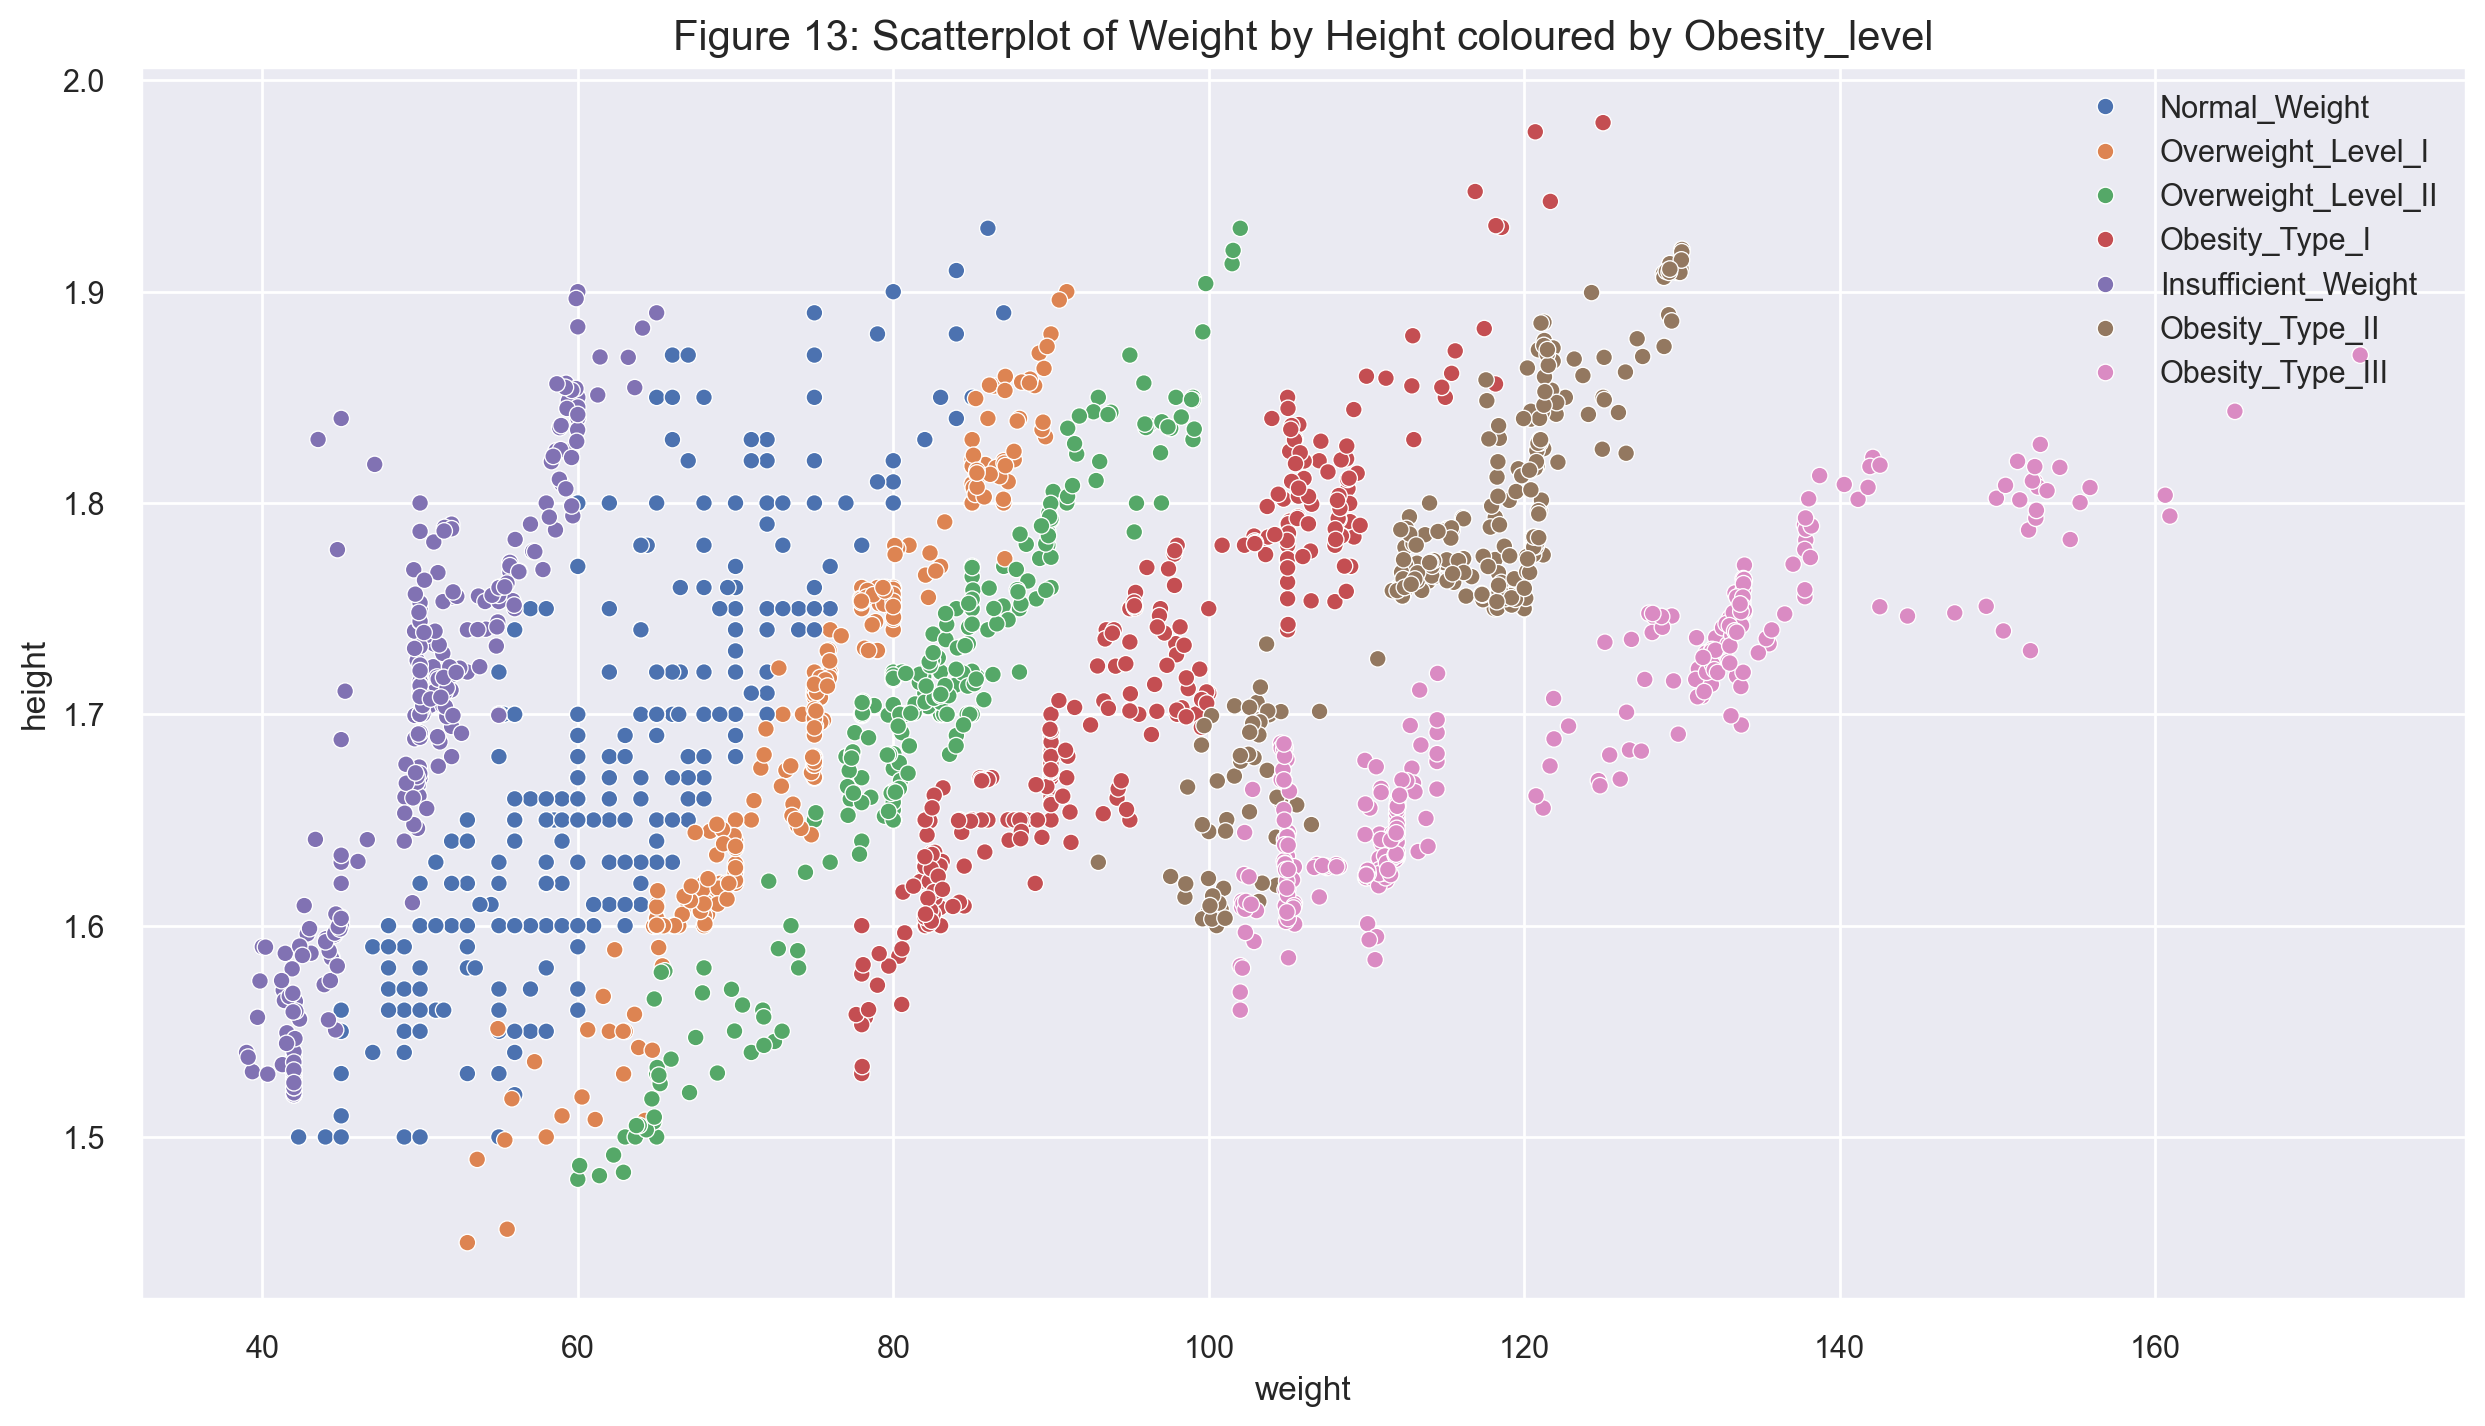

In [35]:
plt.figure(figsize = (15,8))
sns.scatterplot(x='weight', y='height', hue='obesity_level', data=df)
plt.title('Figure 13: Scatterplot of Weight by Height coloured by Obesity_level', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

#### Grouping Age and Weight by Transport Mode 

Table 4 shows that the individuals who use the bike and walking tends to have a lower weight and younger in age.

In [36]:
display(HTML('<b>Table 4: Age and Weight by Transport Mode </b>'))
# grouping obesity levels
df[['transport_method','weight', 'age']].groupby(['transport_method']).mean().round()

,weight,age
transport_method,,
automobile,86.0,28.0
bike,70.0,22.0
motorbike,72.0,23.0
public_transportation,88.0,22.0
walking,71.0,21.0


#### Grouping Age and Weight by Physical Activity 

Table 5 shows that the individuals engaging in physical activity for 4 to 5 days has lower weight overall compared to the individuals who engage in lesser physical activity. The range in physical activity is 0 being the lowest while 3 being the highest.

In [37]:
display(HTML('<b>Table 5: Age and Weight by physical_activity</b>'))
# grouping obesity levels
df[['physical_activity','weight', 'age']].groupby(['physical_activity']).mean().round()

,weight,age
physical_activity,,
0,87.0,24.0
1,90.0,23.0
2,86.0,22.0
3,75.0,22.0


## Literature Review <a id='lt'></a>

Suresh et al. (2022)  proposed a multidimensional perspective for the cause of obesity, with Body Mass Index (BMI) as the primary indicator but also influenced by 20 other factors such as lack of sleep, family inheritance, drinking, and smoking habits. The paper proposes a web-based application to predict the level of obesity risks and offers potential remedies by training the data using various Machine Learning models such as Random Forest and decision tree with an accuracy of 98.48% and 96.96%, respectively.

Rodríguez et al. (2021)  proposed an ML model to predict the difference between overweight and obesity. The dataset, which has 16 attributes associated with eating habits and physical activity, has been trained using ML models such as RF, DT, Support Vector Machine (SVM), with RF having a higher accuracy of 77.69%.Chatterjee et al. (2021)  studied a wide range of publicly available health datasets with risk factors associated with obesity and weight change using various ML classification and regression techniques. The DT and Logistic regression models gave more accurate results for insurance, eating health module datasets, and PIMA diabetes datasets, respectively.

Singh and Tawfik (2020) proposed early prediction of obesity by giving the BMI values at ages 3, 5, 7, 11 and flagging the BMI values of age 14 adolescents for obesity. Synthetic Minority Oversampling Technique (SMOTE) is used to deal with class imbalance and low prediction accuracy, producing accurate predictions for 90% of the target population.

A study has highlighted the significant role genetics plays in obesity. It found that among younger groups, incorporating genetic risk variants notably enhances the accuracy of obesity prediction. The early intervention strategies using predictive models  by integrating genetic and clinical data which might help to mitigate adult obesity (Seyednasrollah et al., 2017). But another study says that obesity's complexity extends beyond phenotype and genetics. While genetics influence fat accumulation and metabolic health, being obese doesn't always equate to illness. Understanding genetic influences on obesity stages is crucial for effective management of health risks (Walley at al., 2006).

Safaei et al. (2021)  explains a systematic review of obesity-caused diseases and the ML methods widely used to predict obesity. RF, DT, SVM, CNN, Artificial Neural Networks (ANN) are used to study the key attributes, implying the necessity of a more robust model with higher accuracy in predicting obesity.KIVRAK, M. (2021)  conducted an analysis on various risk factors of obesity to find the relative importance of these attributes on a scale of 0 to 1. Convolutional Neural Networks (CNN) are used to find that attributes such as weight, history of vegetable intake, gender, and family history have the highest importance, while smoking and calorie consumption have the lowest relative importance when compared to other factors.


Cha et al. (2015)  conducted a data analysis showing that obesity and excessive weight can significantly be reduced by making strategic changes in dietary and eating habits. The overall physical activity has to be amplified in young adults to achieve the physical activity goals. Early changes will reduce obesity progression and the causes of cardiovascular diseases. The use of ML and deep learning methods gives an advantage of providing more accurate and useful insights by understanding complexities between non-linear relationship variables which can be preferred over the statistical methods in predicting the overweight and adolescence obesity.

Pochini et al. (2014)  conducted a statistical data analysis using logistic regression and data mining to find the causes of obesity in students around the age of 15. They focused on three main attributes such as tobacco use, physical activity, and eating breakfast. The results showed that being physically active and eating breakfast are associated with the prevention of obesity, whereas tobacco use is a significant leading factor in obesity. Another study on health risks due to obesity for the high school students shows that ANN and Weighted KNN yields better performance in predicting obesity (Zheng & Ruggiero, 2017). Pang et al. (2019) predicts that obesity is largely affected by evolving factors which can be handled through proper diet and physical habits.

Deep learning methods like RNN are used over Long Term Short Memory, which uses softmax activation weights on the input function. This model calculates the importance of features and weights for each input timestamp. The EHR data is extracted from two million patients, and this model has increased performance when compared with traditional machine learning models such as RF and logistic regression (Gupta at al., 2022). The challenge of finding hidden features due to the irregular time instances of data can be addressed by creating time-aware RNN architectures to predict obesity status improvements, achieving a 77% accuracy in predicting real-time user data (Xue at al., 2018).

## Summary and Conclusion <a id='sc'></a>

In this phase of the project we took to cleaning and preprocessing the data along with exploring the data to identify features that would be influencing obesity levels. 

During the data cleaning phase, we focused on renaming the columns to meaningful names, changing the data types to match with the data and checking for inconsistencies such as the row names and spellings. Additionally, we addressed outliers by dropping them so it would not effect the modeling phase of the report. Lastly we checked for missing values and duplicates, removing any duplicates found within the dataset.

Once the cleaning and preprocessing section was complete, we explored the data using various plots. Our dataset is mainly with categorical variables as mentioned in the dataset details, therefore we utilized bar plots, pie charts, and scatter plots to glean insights. The dataset contains obesity level I individuals as a majority while the individuals with insufficient weight are the lowest in count. The age is positively skewed, whereas height exhibits no skew. Furthermore there is a linear relationship between height and weight which is evident among the numerical variables. Our dataset has a equal representation of the two genders male and female. Also individuals who take meals sometimes in between their main meals are a majority in our dataset. The individuals with a family history of obesity tend to be more obese compared to the ones without a history. The young age group has higher obesity levels compared to other age groups, which shows that young people are more prone to obesity.

The insights we gained from the exploration will be helpful in determining the features that affect the obesity levels. We can validate the features even further using the phase 2 modeling section of the project.

## References <a id='ref'></a>

- Cha, E., Akazawa, M. K., Kim, K. H., Dawkins, C. R., Lerner, H. M., Umpierrez, G., & Dunbar, S. B. (2015). Lifestyle habits and obesity progression in overweight and obese American young adults: Lessons for promoting cardiometabolic health. Nursing & Health Sciences, 17(4), 467–475. https://doi.org/10.1111/nhs.12218

- Chatterjee, A., Gerdes, M. W., Prinz, A., & Martinez, S. G. (2021). Comparing Performance of Ensemble-Based Machine Learning Algorithms to Identify Potential Obesity Risk Factors from Public Health Datasets. Advances in Intelligent Systems and Computing, 253–269. https://doi.org/10.1007/978-981-15-9927-9_26

- Colmenarejo, G. (2020). Machine Learning Models to Predict Childhood and Adolescent Obesity: A Review. Nutrients, 12(8), 2466. https://doi.org/10.3390/nu12082466

- Gupta, M., Phan, T.-L. T., Bunnell, H. T., & Beheshti, R. (2022). Obesity Prediction with EHR Data: A Deep Learning Approach with Interpretable Elements. ACM Transactions on Computing for Healthcare, 3(3), 1–19. https://doi.org/10.1145/3506719

- He, Z. (2022, August). Comparison of different machine learning methods applied to obesity classification. In 2022 International Conference on Machine Learning and Intelligent Systems Engineering (MLISE) (pp. 467-472). IEEE.
[6] KIVRAK, M. (2021). DEEP LEARNING-BASED PREDICTION OF OBESITY LEVELS ACCORDING TO EATING HABITS AND PHYSICAL CONDITION. The Journal of Cognitive Systems. https://doi.org/10.52876/jcs.939875

- Mendoza, F., & Manotas, H. (2019, August 26). Estimation of Obesity Levels Based On Eating Habits and Physical Condition. UCI Machine Learning Repository. Retrieved April, 2024, from https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

- Pang, X., Forrest, C. B., Lê-Scherban, F., & Masino, A. J. (2019, December). Understanding early childhood obesity via interpretation of machine learning model predictions. In 2019 18th IEEE International Conference On Machine Learning And Applications (ICMLA) (pp. 1438-1443). IEEE.

- Pochini, A., Wu, Y., & Hu, G. (2014, August). Data mining for lifestyle risk factors associated with overweight and obesity among adolescents. In 2014 IIAI 3rd International Conference on Advanced Applied Informatics (pp. 883-888). IEEE.

- Rodríguez, E., Rodríguez, E., Nascimento, L., da Silva, A. F., & Marins, F. A. S. (2021, November). Machine learning Techniques to Predict Overweight or Obesity. In IDDM (pp. 190-204) 

- Safaei, M., Sundararajan, E. A., Driss, M., Boulila, W., & Shapi’i, A. (2021). A Systematic Literature Review on obesity: Understanding the Causes & Consequences of Obesity and Reviewing Various Machine Learning Approaches Used to Predict Obesity. Computers in Biology and Medicine, 136(104754). https://doi.org/10.1016/j.compbiomed.2021.104754

- Singh, B., & Tawfik, H. (2020). Machine Learning Approach for the Early Prediction of the Risk of Overweight and Obesity in Young People. Lecture Notes in Computer Science, 523–535. https://doi.org/10.1007/978-3-030-50423-6_39

- Seyednasrollah, F., Mäkelä, J., Pitkänen, N., Juonala, M., Hutri-Kähönen, N., Lehtimäki, T., Viikari, J., Kelly, T., Li, C., Bazzano, L., Elo, L. L., & Raitakari, O. T. (2017). Prediction of Adulthood Obesity Using Genetic and Childhood Clinical Risk Factors in the Cardiovascular Risk in Young Finns Study. Circulation: Cardiovascular Genetics, 10(3). https://doi.org/10.1161/circgenetics.116.001554

- Shen, S. (2021, March 7). ITP 449 Exploratory Data Analysis Project: Obesity Levels Based on Eating Habits and Physical…. Stacy Shen. Retrieved April, 2024, from https://stacyy.medium.com/itp-449-exploratory-data-analysis-project-obesity-levels-based-on-eating-habits-and-physical-82fa10775c2e

- Suresh, C., Kiranmayee, B. V., Milar Jahnavi, Roshan Pampari, Sai Raghu Ambadipudi, & Sai. (2022). Obesity Prediction Based on Daily Lifestyle Habits and Other Factors Using Different Machine Learning Algorithms. Algorithms for Intelligent Systems, 397–407. https://doi.org/10.1007/978-981-16-7389-4_39

- Walley, A. J., Blakemore, A. I. F., & Froguel, P. (2006). Genetics of obesity and the prediction of risk for health. Human Molecular Genetics, 15(suppl_2), R124–R130. https://doi.org/10.1093/hmg/ddl215

- Xue, Q., Wang, X., Meehan, S., Kuang, J., Gao, J. A., & Chuah, M. C. (2018, December). Recurrent neural networks based obesity status prediction using activity data. In 2018 17th IEEE International Conference on Machine Learning and Applications (ICMLA) (pp. 865-870). IEEE.

- Zheng, Z., & Ruggiero, K. (2017, November). Using machine learning to predict obesity in high school students. In 2017 IEEE International Conference on Bioinformatics and Biomedicine (BIBM) (pp. 2132-2138). IEEE.